 #                                         CAPSTONE PROJECT

# Predicting Mental Health in Tech workplace

In [1]:
# importting reguired libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:

df

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

In [3]:
pd.options.display.max_columns=None

## DATA UNDERSTANDING

### Columns in dataset:
**•Timestamp**<br>
**• Age**<br>
**• Gender**<br>
**• Country**<br>
**• state** : If you live in the United States, which state or territory do you live in?<br>
**• self_employed** : Are you self-employed?<br>
**• family_history** : Do you have a family history of mental illness?<br>
**• treatment** : Have you sought treatment for a mental health condition?<br>
**• work_interfere** : If you have a mental health condition, do you feel that it interferes with your work?<br>
**• no_employees** : How many employees does your company or organization have?<br>
**• remote_work** : Do you work remotely (outside of an office) at least 50% of the time?<br>
**• tech_company** : Is your employer primarily a tech company/organization?<br>
**• benefits** : Does your employer provide mental health benefits?<br>
**• care_options** : Do you know the options for mental health care your employer provides?<br>
**• wellness_program** : Has your employer ever discussed mental health as part of an employee wellness program?<br>
**• seek_help** : Does your employer provide resources to learn more about mental health issues and how to seek help?<br>
**• anonymity** : Is your anonymity protected if you choose to take advantage of mental health or substance abuse treat<br>
**• leave** : How easy is it for you to take medical leave for a mental health condition?<br>
**• mentalhealthconsequence** : Do you think that discussing a mental health issue with your employer would have negative consequences<br>
**• physhealthconsequence** : Do you think that discussing a physical health issue with your employer would have negative consequences<br>
**• coworkers** : Would you be willing to discuss a mental health issue with your coworkers?<br>
**• supervisor** : Would you be willing to discuss a mental health issue with your direct supervisor(s)?<br>
**• mentalhealthinterview** : Would you bring up a mental health issue with a potential employer in an interview? <br>
**• physhealthinterview** : Would you bring up a physical health issue with a potential employer in an interview?<br>
**• mentalvsphysical** : Do you feel that your employer takes mental health as seriously as physical health?<br>
**• obs_consequence** : Have you heard of or observed negative consequences for coworkerswith mental health conditions<br>
**• comments**    


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

There 2 columns in total, out of we have only are numeric datatype and remaining 26 columns are object data type.<br>
Out of the 26 object datatype columns, 24 columns are catergorical variables.

In [5]:
# Description about the numeric column
df.describe().applymap('{:,.2f}'.format)

Age
count           1,259.00
mean       79,428,148.31
std     2,818,299,442.98
min            -1,726.00
25%                27.00
50%                31.00
75%                36.00
max    99,999,999,999.00

There are 1259 entries in the age column.The maximun and minimum age values doesnot make sense. Hence we have to check for garbage values in the column

In [6]:
# Description of object type variables
df.describe(include='object')

Timestamp Gender        Country state self_employed  \
count                  1259   1259           1259   744          1241   
unique                 1246     49             48    45             2   
top     2014-08-27 12:44:51   Male  United States    CA            No   
freq                      2    615            751   138          1095   

       family_history treatment work_interfere no_employees remote_work  \
count            1259      1259            995         1259        1259   
unique              2         2              4            6           2   
top                No       Yes      Sometimes         6-25          No   
freq              767       637            465          290         883   

       tech_company benefits care_options wellness_program seek_help  \
count          1259     1259         1259             1259      1259   
unique            2        3            3                3         3   
top             Yes      Yes           No               No        No   
freq           1031      477          501              842       646   

         anonymity       leave mental_health_consequence  \
count         1259        1259                      1259   
unique           3           5                         3   
top     Don't know  Don't know                        No   
freq           819         563                       490   

       phys_health_consequence     coworkers supervisor  \
count                     1259          1259       1259   
unique                       3             3          3   
top                         No  Some of them        Yes   
freq                       925           774        516   

       mental_health_interview phys_health_interview mental_vs_physical  \
count                     1259                  1259               1259   
unique                       3                     3                  3   
top                         No                 Maybe         Don't know   
freq                      1008                   557                576   

       obs_consequence                         comments  
count             1259                              164  
unique               2                              160  
top                 No  * Small family business - YMMV.  
freq              1075                                5

The column Gender has 49 unique entries. We will look into that further.<br>
The few columns seems to have null values. Depending upon the null value percentage of each column and the value it adds to the dataset, we take appropritae actions further.

### Check for null values

In [7]:
# Percentage of null values in each column
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

comments                     86.973789
state                        40.905481
work_interfere               20.969023
self_employed                 1.429706
seek_help                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
anonymity                     0.000000
Timestamp                     0.000000
wellness_program              0.000000
Age                           0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
Gender                   

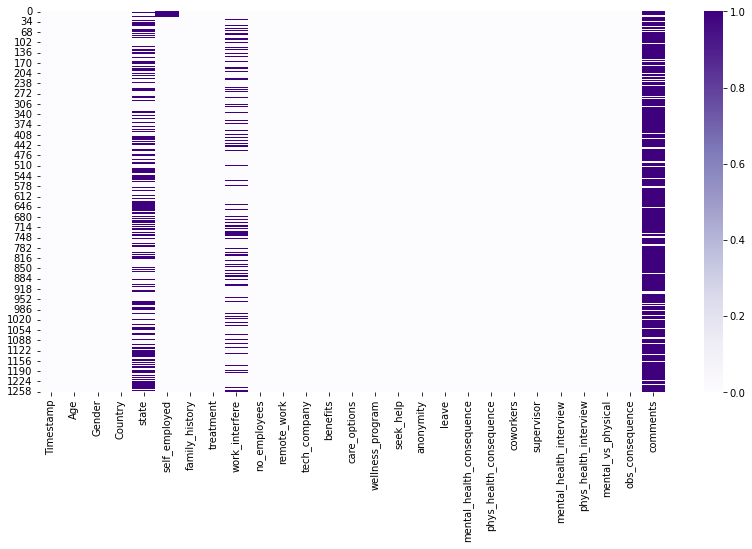

In [8]:
# plotting the null values in heatmap
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),cmap='Purples')
plt.show()

The column comments has comments 87% null values. Hence we drop the column.<br>
The column state has 41% null values and it is not adding significant information to the dataset. Hence we drop the column.<br>
The column work interfere has 21 % null values. This column adds significant information, hence we replace the null values with the mode of the column.<br>
The column self employed has only 1.4% missing value. This also replaced with mode values.

### Check for duplicate values

In [9]:
df.duplicated().sum()

0

There are no duplicated values present in the dataset

## DATA PREPROCESSING

Here we perform preprocession to drop the redundant columns and clean the data from garbage values

In [10]:
# Droping the columns timestamp, state, comments
df.drop(columns=['Timestamp', 'state', 'comments'],axis=1,inplace=True)

In [11]:
df.head(2)
df['Age'].mean()

79428148.31135821

Cleaning the data from garbage values

Checking the column Age

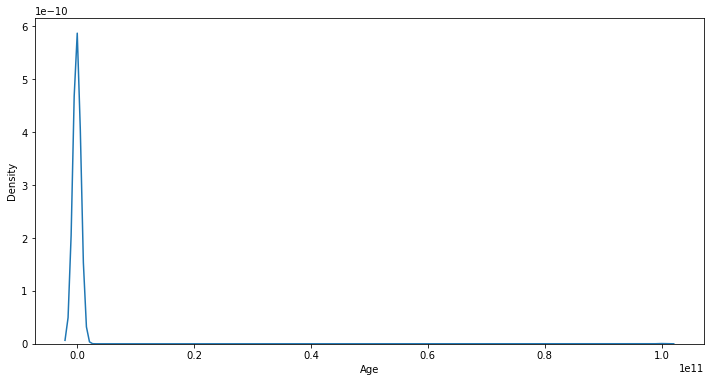

In [12]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Age'])
plt.show()

In [13]:
age_mismatch  = df[(df['Age']>80) | (df['Age']<13)].index

In [14]:
df.drop(index=age_mismatch,axis=0,inplace=True)

The column Gender has 49 unique values. For the sake of simplicity we categorise them into Male, Female and Others.

In [15]:
df.shape

(1251, 24)

In [16]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [197]:
df.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

## EXPLORATORY DATA ANALYSIS

### Univariant Analysis

In [19]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Age

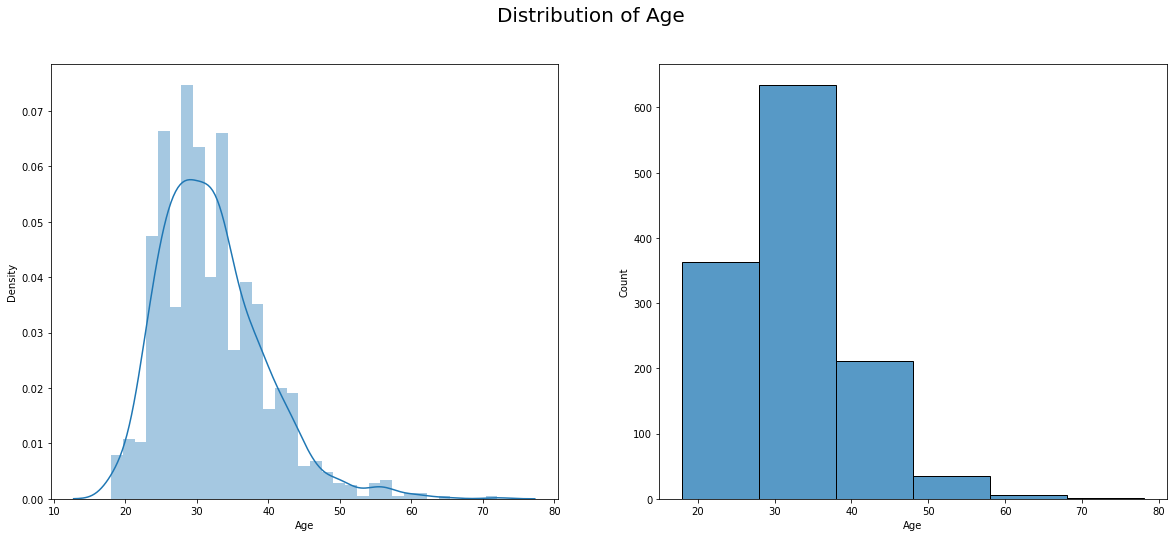

In [20]:
plt.subplots(1,2,figsize=(20,8))

plt.subplot(121)
sns.distplot(x=df['Age'])
plt.xlabel('Age')


plt.subplot(122)
sns.histplot(x=df.Age,binwidth=10)

plt.suptitle ('Distribution of Age',fontsize=20)
plt.show()

Majority employees age is in their 30's. The column age is right skewed. 

### Gender

In [21]:
df.Gender.value_counts()

Male      985
Female    248
Others     18
Name: Gender, dtype: int64

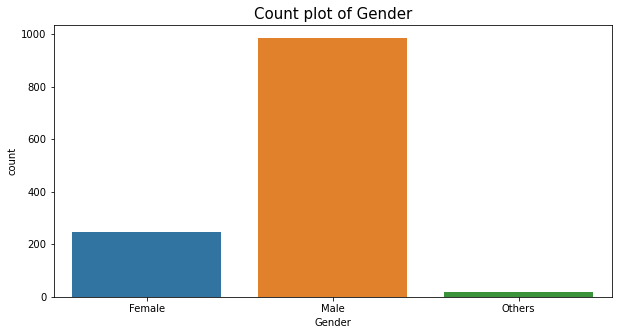

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Gender'])
plt.title('Count plot of Gender',fontsize=15)
plt.show()

Majority of them employees are male. Other gender group is the minority genger 

### Country

In [23]:
df.Country.value_counts()

United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

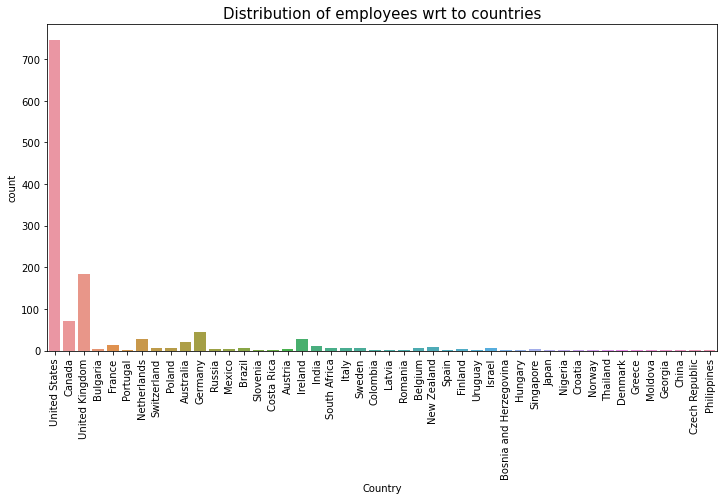

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Country'])
plt.xticks(rotation=90)
plt.title('Distribution of employees wrt to countries',fontsize=15)
plt.show()

In [25]:
df.Country.nunique()

46

The are employees from 46 countries who have taken the survey. 50% of the people are from United states. There are also significant employees from United Kingdom and Canada.

### Self employed

In [26]:
df.self_employed.value_counts()

No     1091
Yes     142
Name: self_employed, dtype: int64

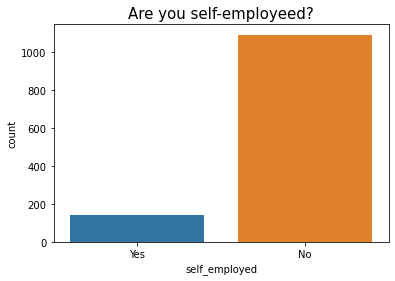

In [27]:
sns.countplot(x=df['self_employed'])
plt.title('Are you self-employeed?',fontsize=15)
plt.show()

In [28]:
df=pd.read_csv('Survey.csv')
df.shape

(1259, 27)

Majority (80%) of the people work for others

### Family history

In [29]:
df.family_history.value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

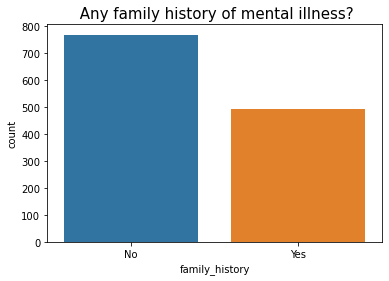

In [30]:
sns.countplot(x=df['family_history'])
plt.title(' Any family history of mental illness?',fontsize=15)
plt.show()

60% of the employees have no family history mental illness

###  Treatment

In [31]:
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

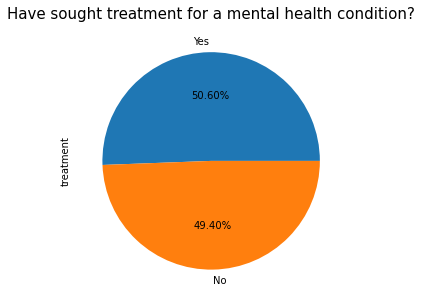

In [32]:
plt.figure(figsize=(10,5))
df.treatment.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Have sought treatment for a mental health condition?',fontsize=15)
plt.show()

50% employeses Have sought treatment for a mental health condition

###  Work interfere

In [33]:
df.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

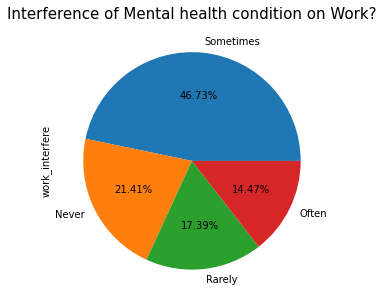

In [34]:
plt.figure(figsize=(10,5))
df.work_interfere.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Interference of Mental health condition on Work?',fontsize=15)
plt.show()

78 % of employees have experienced some sort of work interference due to mental illness

### No_employees

In [35]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

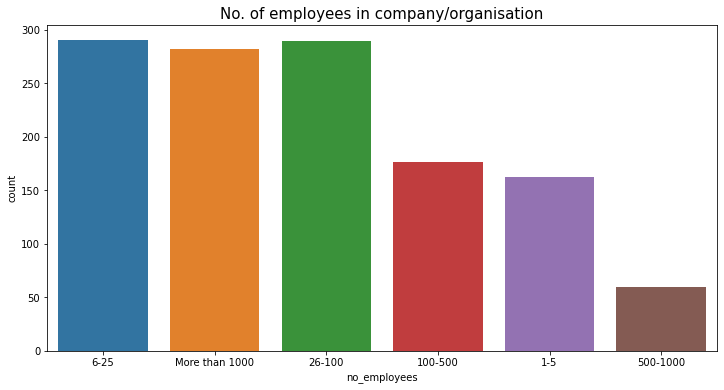

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.no_employees)
plt.title('No. of employees in company/organisation',fontsize=15)
plt.show()

Most people work in a small employerss group(<100) and followed by large group(>1000) employees

### Remote work

In [37]:
df.remote_work.value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

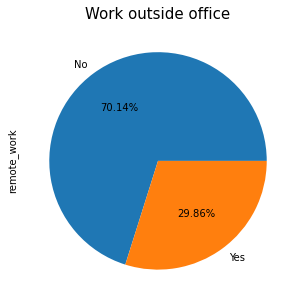

In [38]:
plt.figure(figsize=(10,5))
df.remote_work.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Work outside office',fontsize=15)
plt.show()

 Only 30% of people are able to work remotely

### Tech company

In [39]:
df.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

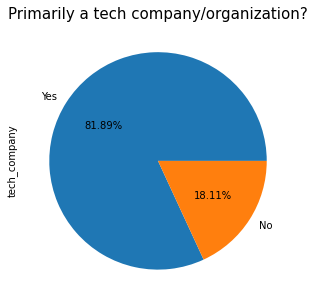

In [40]:
plt.figure(figsize=(10,5))
df.tech_company.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Primarily a tech company/organization?',fontsize=15)
plt.show()

82% of employer is primarily a tech company/organization

### Benefits

In [41]:
df.benefits.value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

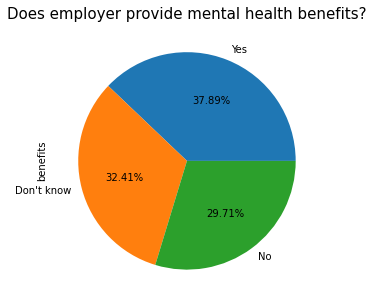

In [42]:
plt.figure(figsize=(10,5))
df.benefits.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does employer provide mental health benefits?',fontsize=15)
plt.show()

38% of employees have been provided with mental health benifits 
32% of employeers don't know about the mental helath benifits provided by the employeers. Which shows the lack of awarness

### Care options

In [43]:
df.care_options.value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

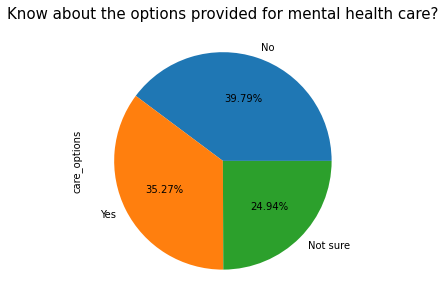

In [44]:
plt.figure(figsize=(10,5))
df.care_options.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Know about the options provided for mental health care?',fontsize=15)
plt.show()

Only 35% of employees know about the options for mental health care their employer provides.
This shows lack of awarness amoung employees

### Wellness program

In [45]:
df.wellness_program.value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

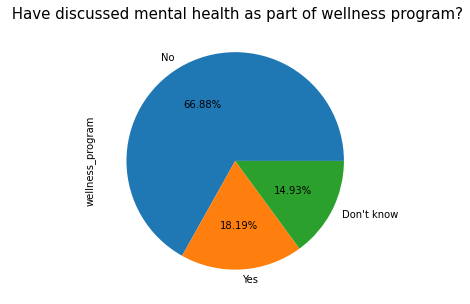

In [46]:
plt.figure(figsize=(10,5))
df.wellness_program.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title(' Have discussed mental health as part of wellness program?',fontsize=15)
plt.show()

67% of employer have not discussed mental health as part of an employee wellness program.
 Mental health is not given as much importance as physical health by employess

###  Seek help

In [47]:
df.seek_help.value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

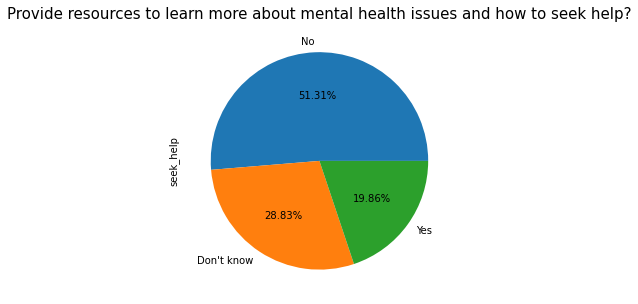

In [48]:
plt.figure(figsize=(10,5))
df.seek_help.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Provide resources to learn more about mental health issues and how to seek help?',fontsize=15)
plt.show()

Only 20% of employers provide resources to learn more about mental health issues and how to seek help

### Anonymity 

In [49]:
df.anonymity.value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

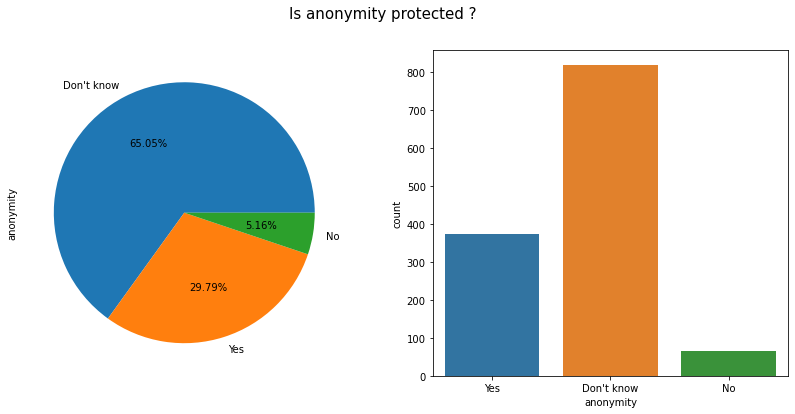

In [50]:
plt.subplots(1,2,figsize=(14,6))

plt.subplot(121)
df.anonymity.value_counts().plot(kind='pie',autopct='%0.2f%%')

plt.subplot(122)
sns.countplot(x=df.anonymity)

plt.suptitle('Is anonymity protected ? ', fontsize=15)
plt.show()

65% of employees are unaware about anaonymity protection provided by employers
Out of aware employees, majority of the employers provide anonymity protection

### Leave 

In [51]:
df.leave.value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

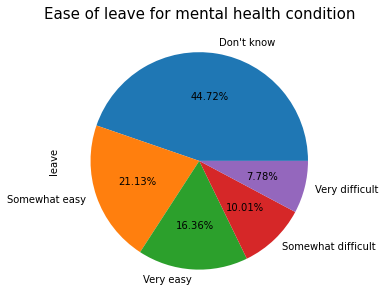

In [52]:
plt.figure(figsize=(10,5))
df.leave.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Ease of leave for mental health condition',fontsize=15)
plt.show()

45% of the employees are ignorant about the easy of leave to take leave for medical health conditions
Out of the known employees, majority of employees have ease in applying leave for mental health conditions

### Mental Health Consequence
       

In [53]:
df.mental_health_consequence.value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

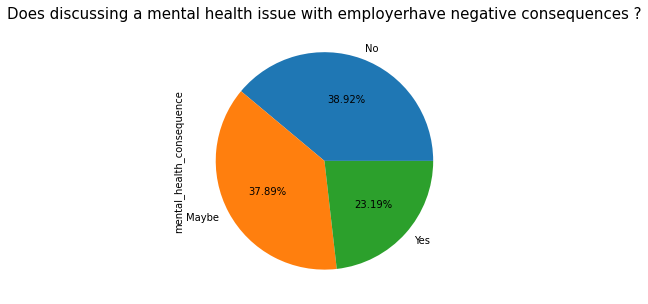

In [54]:
plt.figure(figsize=(10,5))
df.mental_health_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does discussing a mental health issue with employerhave negative consequences ?',fontsize=15)
plt.show()

39% of employees think that discussing a mental health issue with your employer would not have negative consequences
But 38% of employees  think that discussing a mental health issue with your employer would have negative consequences which shows the stigma around mental health

### Physical Health Consequence

In [55]:
df.phys_health_consequence.value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

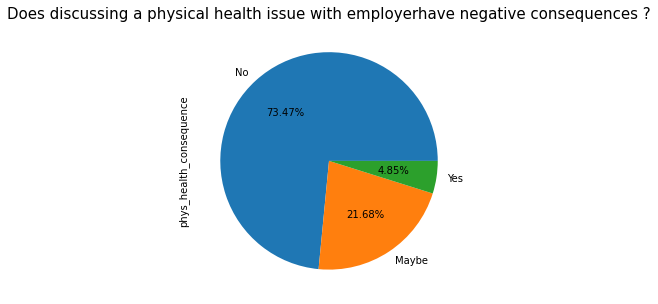

In [56]:
plt.figure(figsize=(10,5))
df.phys_health_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does discussing a physical health issue with employerhave negative consequences ?',fontsize=15)
plt.show()

74% of employees think that discussing a physical health issue with your employer would have no negative consequences
This shows that majority of employees have no problem in discussing physical health with employers

###  Coworkers 

In [57]:
df.coworkers.value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

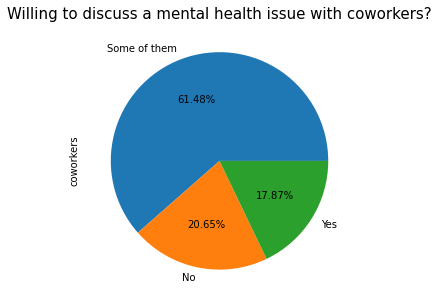

In [58]:
plt.figure(figsize=(10,5))
df.coworkers.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Willing to discuss a mental health issue with coworkers?',fontsize=15)
plt.show()

Only 18 % of the employees are willing to discuss a mental health issue with coworkers
61.5 % of the employees are willing to discuss a mental health issue with some of the coworkers meaning that they are willing to openly dicuss it with everyone

### Supervisor
       

In [59]:
df.supervisor.value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

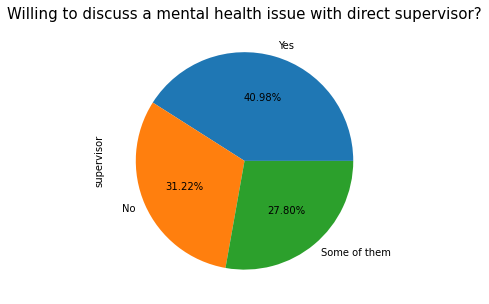

In [60]:
plt.figure(figsize=(10,5))
df.supervisor.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Willing to discuss a mental health issue with direct supervisor?',fontsize=15)
plt.show()

41% of employees are willing to discuss a mental health issue with your direct supervisor(s), which is a good sign
31% of employees are not willing to discuss a mental health issue with your direct supervisor(s)

### Mental Health Interview

In [61]:
df.mental_health_interview.value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

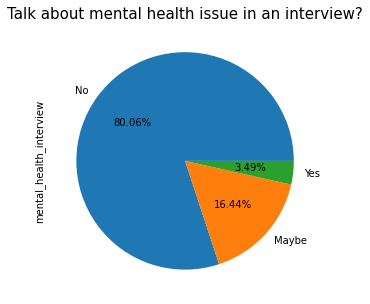

In [62]:
plt.figure(figsize=(10,5))
df.mental_health_interview.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Talk about mental health issue in an interview?',fontsize=15)
plt.show()

80% of employees are not willing to bring up a mental health issue with a potential employer in an interview.
Only 3%  of employees are willing to bring up a mental health issue with a potential employer in an interview.
16.5% of employees are open to bring up a mental health issue with a potential employer in an interview.
This show the stigma around mental health.

###  Physical Health Interview
       

In [63]:
df.phys_health_interview.value_counts()

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

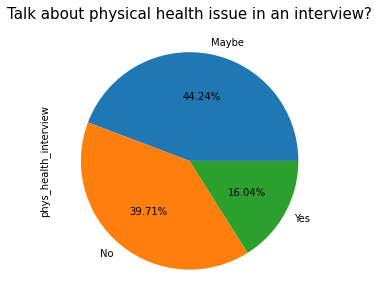

In [64]:
plt.figure(figsize=(10,5))
df.phys_health_interview.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Talk about physical health issue in an interview?',fontsize=15)
plt.show()

Only 40% of employees are not willing to bring up a physical health issue with a potential employer in an interview which is half of the people are not willing to bring up a mental health issue with a potential employer in an interview.
16% of employees are willing to bring up a physical health issue with a potential employer in an interview which is 5 times that of mental health issues interview.
44% of employees are open to bring up a physical health issue with a potential employer in an interview.
This shows discrimination between physical and mental health issues in employees view.

### Mental vs Physical 

In [65]:
df.mental_vs_physical.value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

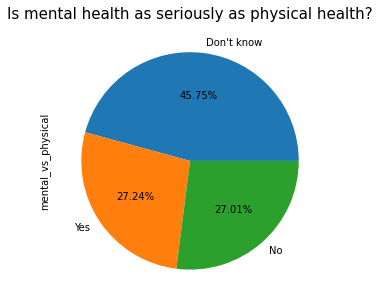

In [66]:
plt.figure(figsize=(10,5))
df.mental_vs_physical.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Is mental health as seriously as physical health?',fontsize=15)
plt.show()

46 % of employees don't know about the opinion of employer.Remaining employees have  uniform opinion abouthow their employers takes mental health as seriously as physical health. 

### Observed Consequence

In [67]:
df.obs_consequence.value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

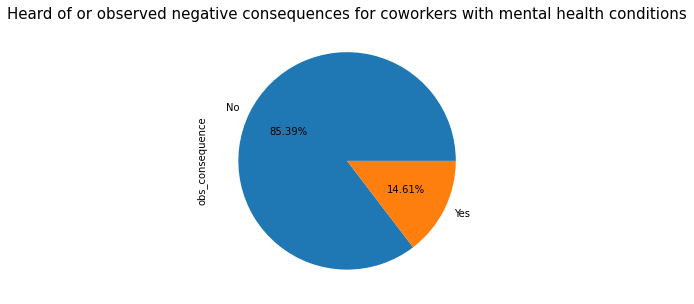

In [68]:
plt.figure(figsize=(10,5))
df.obs_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Heard of or observed negative consequences for coworkers with mental health conditions',fontsize=15)
plt.show()

85.5% of employees have not heard of or observed negative consequences for coworkers with mental health conditions.
Shows that mental health of a person is not affecting coworkers.

### Bivariant Analysis

### Age Vs Gender

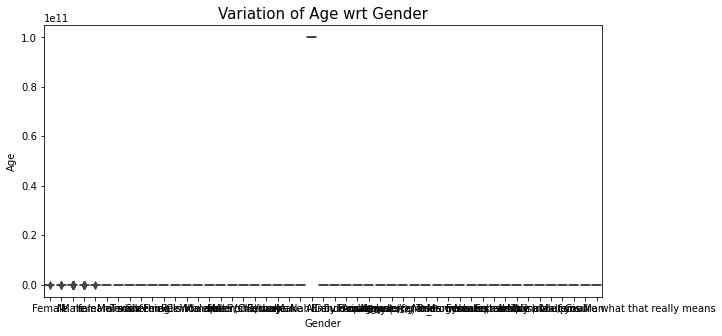

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Gender,y=df.Age)
plt.title('Variation of Age wrt Gender',fontsize=15)
plt.show()

The  age of male employees has higher median , we can say that on average age of male employee is higher.<br> 
Minumum age of female n nale employee facing health issue is 20


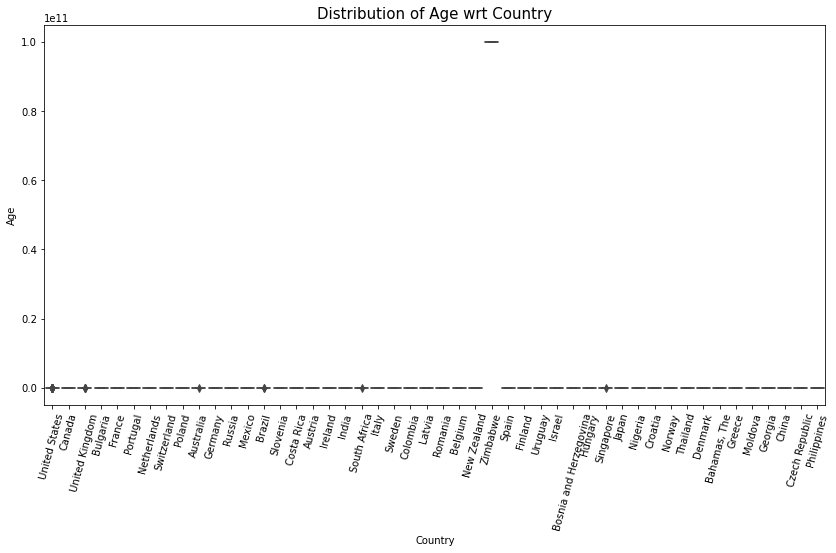

In [70]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df.Country,y=df.Age)
plt.xticks(rotation=75)
plt.title('Distribution of Age wrt Country',fontsize=15)
plt.show()

Employees with age >50 are from USA. USA has the maximum age interval of employees. This may be due to a more number of responses from USA.

### Age Vs Self Employed

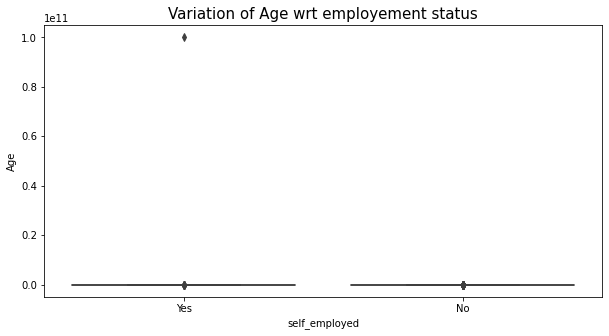

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.self_employed,y=df.Age)
plt.title('Variation of Age wrt employement status',fontsize=15)
plt.show()

The age of self-employed employees has higher median , we can say that on average age of self-employed employee is higher<br>Age of self-employed Employees ranges from 20 to 60 above.<br>Age of on self-employed Employees ranges 20 to 60

### Age Vs Family History

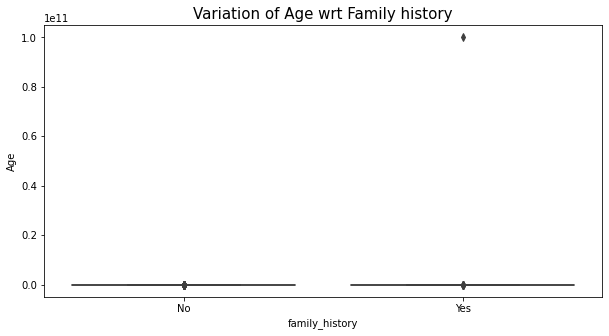

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['family_history'],y=df['Age'])
plt.title('Variation of Age wrt Family history',fontsize=15)
plt.show()

The age of employees with  family history 0f mental health is slighly  higher median ,thus we can say that average age of employee having no family history id 35.
The overall range for the employess with no family history is higher but the IQR has lower values.  

### Age Vs Treatment

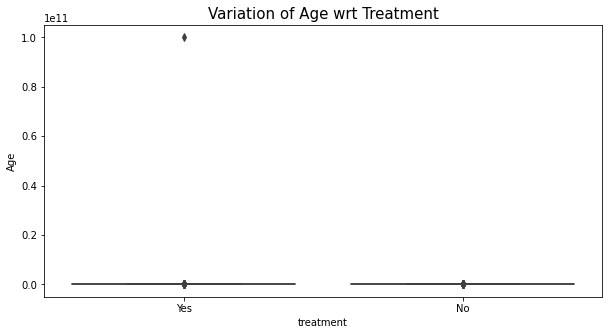

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.treatment,y=df.Age)
plt.title('Variation of Age wrt Treatment',fontsize=15)
plt.show()

The average age of  employees  who have sought their treatment is slighly higher.<br>
Age of employee who have not sought their treatment can be above 60

### Age Vs Work_interfere

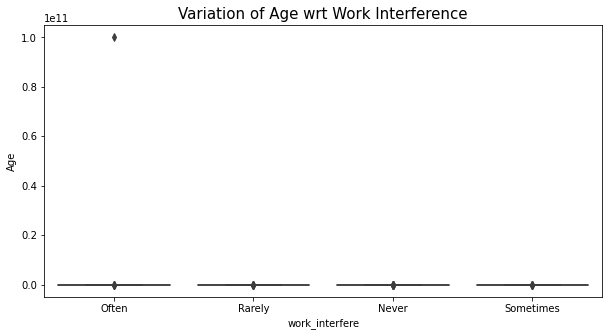

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.work_interfere,y=df.Age)
plt.title('Variation of Age wrt Work Interference',fontsize=15)
plt.show()

Employees who has never faced work interference are of slightly lower age 

### Age Vs No of Employees

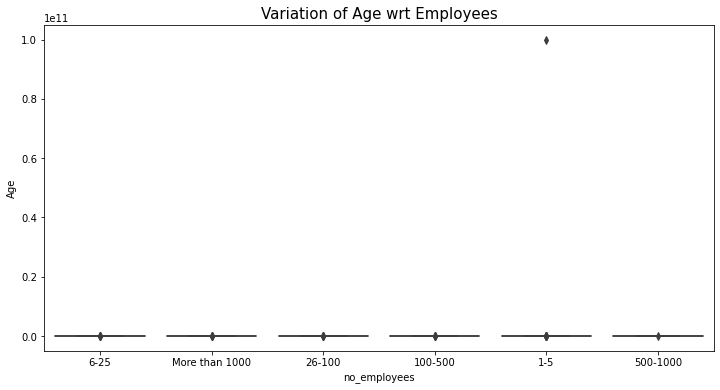

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.no_employees,y=df.Age)
plt.title('Variation of Age wrt Employees',fontsize=15)
plt.show()

The average age of  employees in organization having more than 1000 employees is  higher.<br>
Maximun age of employee in organization having more than 1000 employees ranges upto 60.<br>
Maximun age of employee in organization having 6-25 employees ranges above 60

### Age Vs Remote work

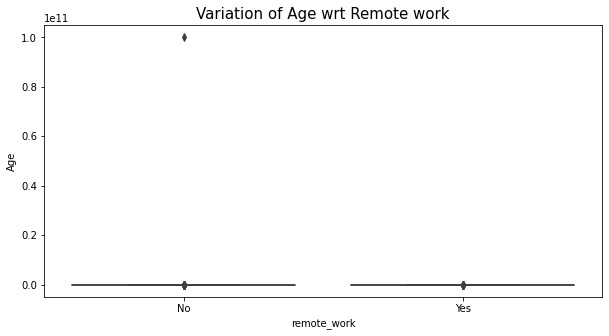

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.remote_work,y=df.Age)
plt.title('Variation of Age wrt Remote work',fontsize=15)
plt.show()

The average age of  employees  work remotely (outside of an office) is slighly higher.<br>
Age of employees who are allowed to work remotely are above

### Age Vs Tech Company

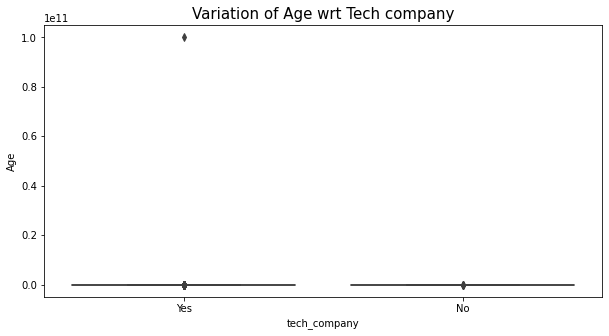

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tech_company,y=df.Age)
plt.title('Variation of Age wrt Tech company',fontsize=15)
plt.show()

On average the employees whose employers are not  a tech company/organization  have high age <br>
Minimum age of employee whose employers are not  a tech company/organization is 20 

### Age Vs Benefits

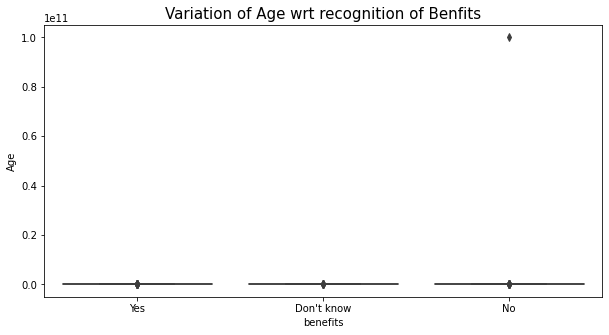

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.benefits,y=df.Age)
plt.title('Variation of Age wrt recognition of Benfits',fontsize=15)
plt.show()

On an average the age of employees who know about the mental helath benifits provided by the employeer is higher.<br> 
The centre of distribution Yes is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
Majority of employes above age 55 know about the mental helath benifits provided by the employeer is higher.


### Age Vs Care options

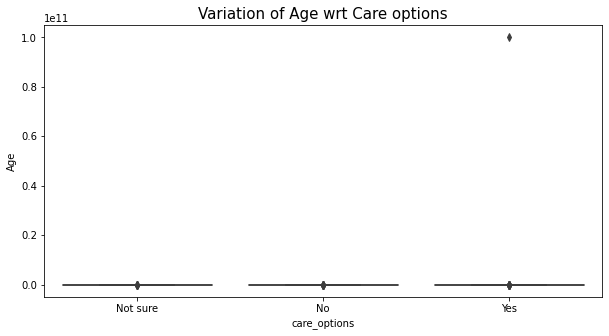

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.care_options,y=df.Age)
plt.title('Variation of Age wrt Care options',fontsize=15)
plt.show()

On an average the age of employees who know about the mental helath care options provided by the employeer is higher.<br>
The centre of distribution Yes is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
Distribution of age of employees who are not sure and dont know about careoptions  is approximately symmetric, because both half-boxes are almost the same.<br> 
Age employees who dont know about gealth care options ranges above 60.

### Age Vs Wellness_program

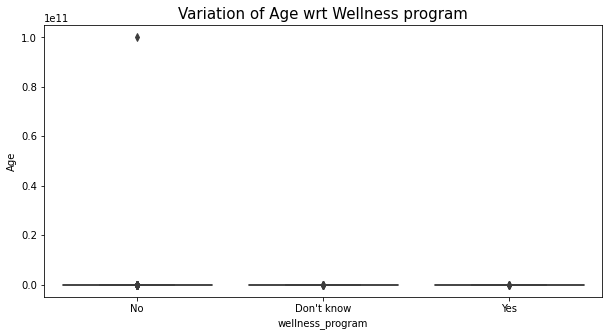

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.wellness_program,y=df.Age)
plt.title('Variation of Age wrt Wellness program',fontsize=15)
plt.show()

On an average the age of employees whose employer  discussed mental health as part of an employee wellness program is higher.<br>
The centre of distribution of age of employyes whose employer  discussed mental health is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
There are employees above age 48 whose employes did not discuss with them about mental health as part of wellnes sprogram

### Age Vs Seek help

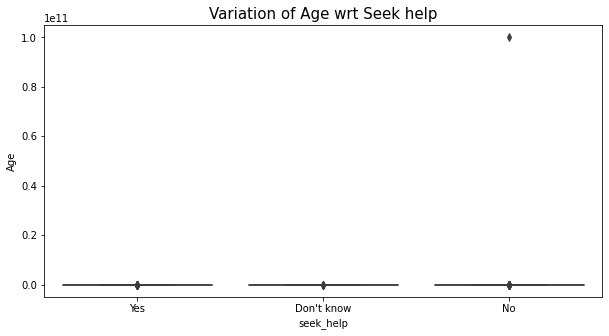

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.seek_help,y=df.Age)
plt.title('Variation of Age wrt Seek help',fontsize=15)
plt.show()

Average age of employees whose employer provide resources to learn more about mental health issues are higher .
<br>Few employees above age 50 dont know about the resources that employer provide to learn about health issue and how to seek help.
<br>Majority of employees of age above 48 are those whose employer does not  provide resources to learn more about mental health issues are higher .

### Age Vs Anonymity

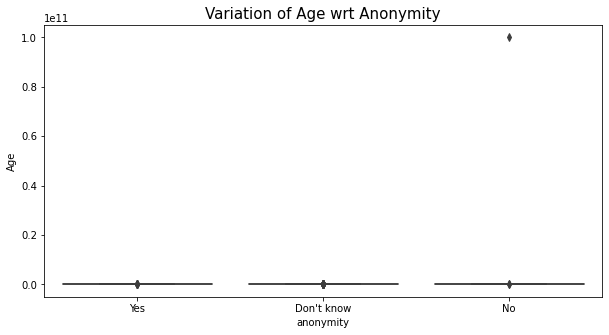

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.anonymity,y=df.Age)
plt.title('Variation of Age wrt Anonymity',fontsize=15)
plt.show()

In [83]:
#majority of employee above age 48 dont know about anonymity


### Age Vs Leave

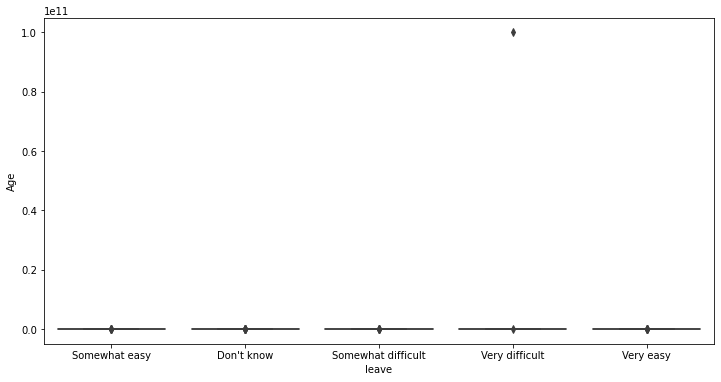

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.leave,y=df.Age)
plt.show()

### Age Vs Mental_health_consequence

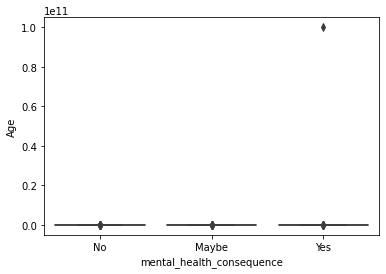

In [85]:
sns.boxplot(x=df.mental_health_consequence,y=df.Age)
plt.show()

Average age of employee who think think that discussing a mental health issue with your employer would have negative consequences is high.
Majority of employee above age 50 think that it might be possible to have negative consequences with employer if they discuss about mental health 

### Age Vs Physical_health_consequence

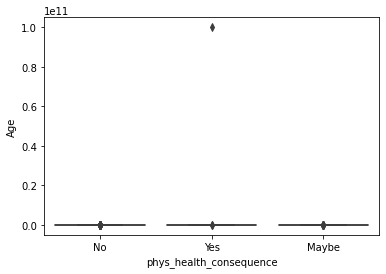

In [86]:
sns.boxplot(x=df.phys_health_consequence,y=df.Age)
plt.show()

Majority of employees about age 48 think think that discussing about physical health issue with your employer would not  have negative consequences is high

### Age Vs Coworkers

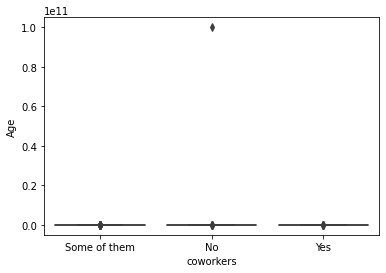

In [87]:
sns.boxplot(x=df.coworkers,y=df.Age)
plt.show()

Majotity of employees above age 50 will only be comforatable with some of the workers to discuss about mental health

### Age Vs Supervisor

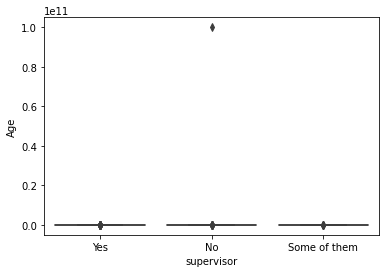

In [88]:
sns.boxplot(x=df.supervisor,y=df.Age)
plt.show()

Some of the employees's age who are willing to discuss a mental health issue with  direct supervisor has highest average age.
Majority of employees above age 50 are willing to discuss a mental health issue with  direct supervisor

### Age Vs Mental_health_interview

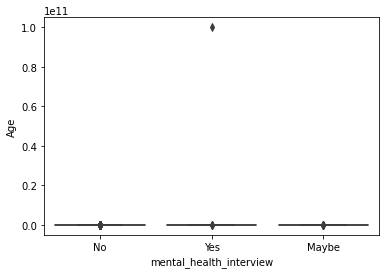

In [89]:
sns.boxplot(x=df.mental_health_interview,y=df.Age)
plt.show()

Employees above age 50 will not bring up a mental health issue with a potential employer in an interview.
Distribution employees age who are ready to bring up a mental health issue with a potential employer in an interviewis approximately symmetric, because both half-boxes are almost the same 


### Age Vs Physical_health_interview

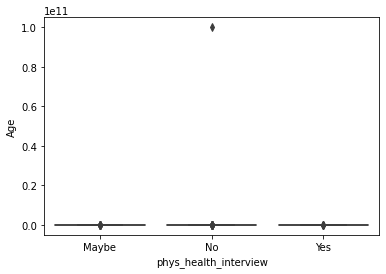

In [90]:
sns.boxplot(x=df.phys_health_interview,y=df.Age)
plt.show()

Average age of employees who are not willing to bring up a physical health issue with a potential employer in an interview is higher.
Age of employees who are not willing to bring up a physical health issue with a potential employer in an interview ranges above 60


### Age Vs Mental_health and Physical_health

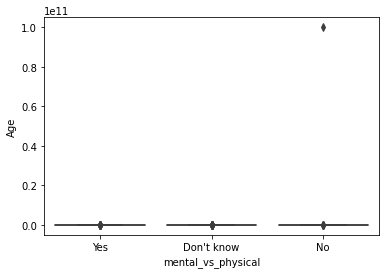

In [91]:
sns.boxplot(x=df.mental_vs_physical,y=df.Age)
plt.show()

Average of empoyer who does not takes mental health as seriously as physical health is higher .
Majority of employers above age 48 takes mental health as seriously as physical health

### Age Vs Obesity_consequence

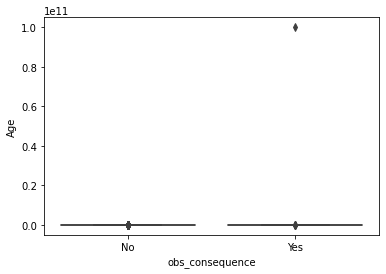

In [92]:
sns.boxplot(x=df.obs_consequence,y=df.Age)
plt.show()

Majority of employees above age 50 did not  observed negative consequences for coworkers with mental health conditions in your workplace

In [93]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [94]:
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes         Yes     Not sure               No         Yes   
1           No  Don't know           No       Don't know  Don't know   
2          Yes          No           No               No          No   
3          Yes          No          Yes               No          No   
4          Yes         Yes           No       Don't know  Don't know   

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1  Don't know          Don't know                     Maybe   
2  Don't know  Somewhat difficult                        No   
3          No  Somewhat difficult                       Yes   
4  Don't know          Don't know                        No   

  phys_health_consequence     coworkers supervisor mental_health_interview  \
0                      No  Some of them        Yes                      No   
1                      No            No         No                      No   
2                      No           Yes        Yes                     Yes   
3                     Yes  Some of them         No                   Maybe   
4                      No  Some of them        Yes                     Yes   

  phys_health_interview mental_vs_physical obs_consequence comments  
0                 Maybe                Yes              No      NaN  
1                    No         Don't know              No      NaN  
2                   Yes                 No              No      NaN  
3                 Maybe                 No             Yes      NaN  
4                   Yes         Don't know              No      NaN

### Gender Vs Self_employed

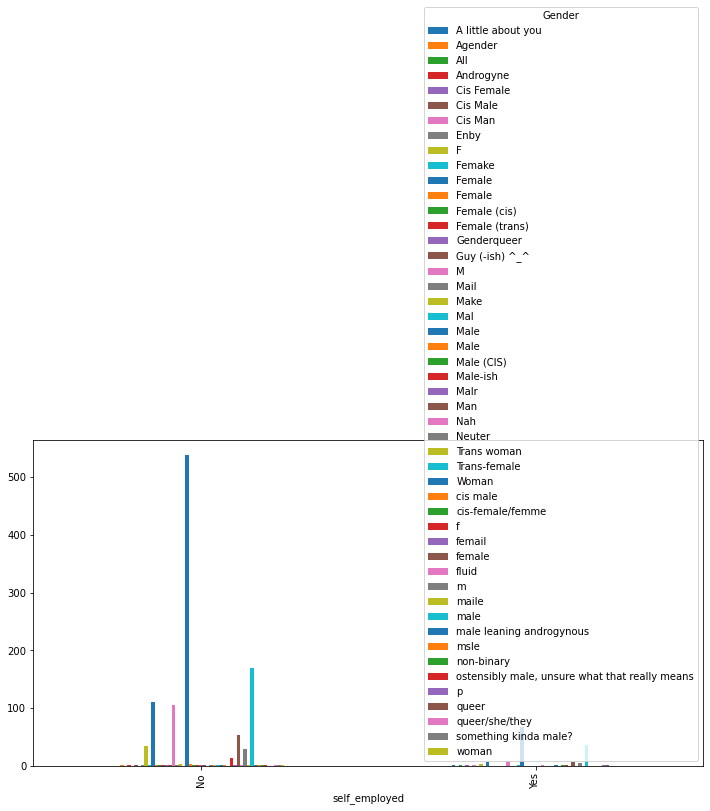

In [95]:
pd.crosstab(df['self_employed'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males and females are not self employed.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Gender Vs Family_history

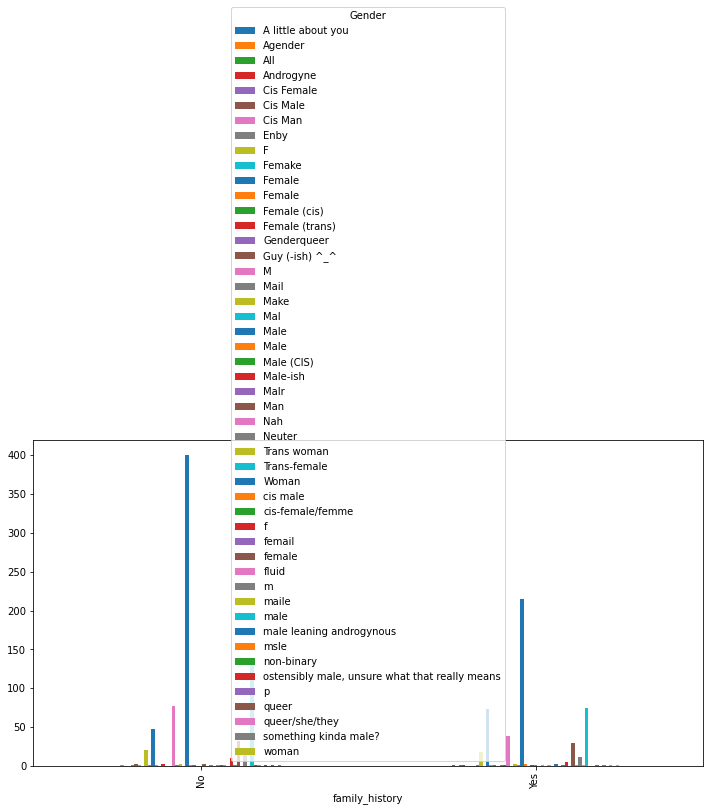

In [97]:
pd.crosstab(df['family_history'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males have no family history of mental health issues.
Slightly higher no. of females and other genders have family history of mental health issues.

### Gender Vs Treatment

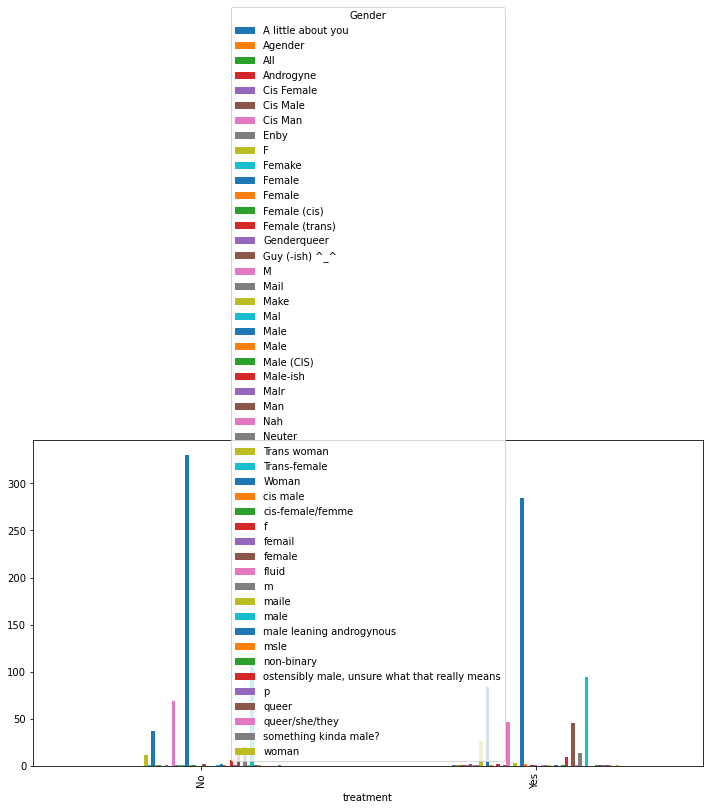

In [98]:
pd.crosstab(df['treatment'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher no. of males are not undergoing any treatment regarding their mental health.
Higher no of females and other  genders are undergoing any treatment regarding their mental health.

### Gender Vs Work_intrefere

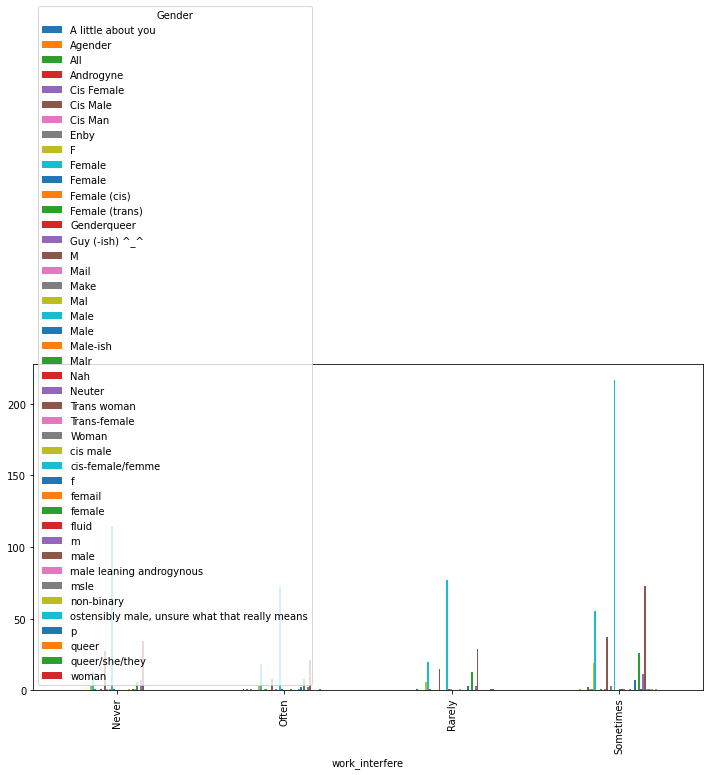

In [99]:
pd.crosstab(df['work_interfere'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

All the genders are facing some kind of work interference

### Gender Vs Remote_work

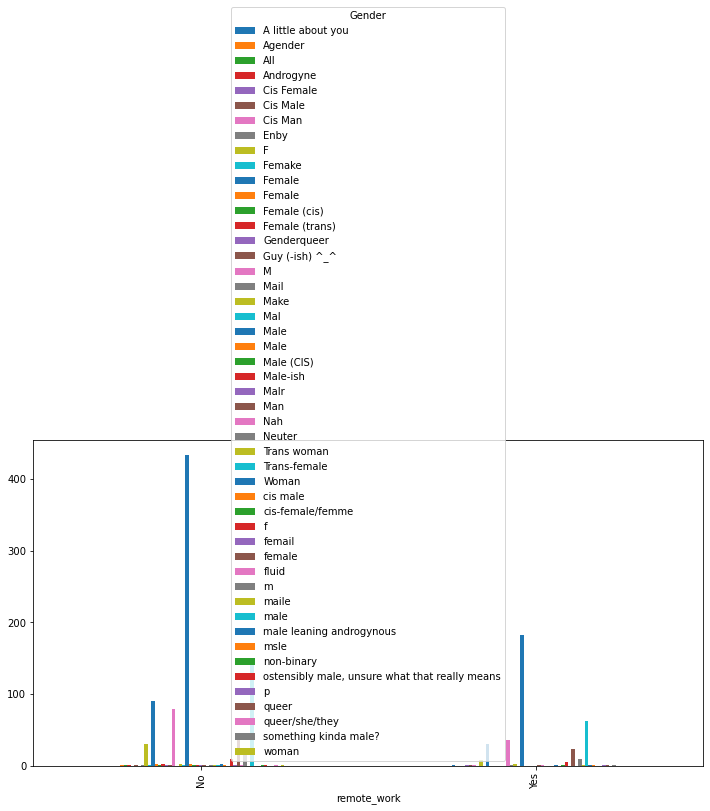

In [100]:
pd.crosstab(df['remote_work'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similar distribution can be seen in all genders. We may conclude that working remotely is independent of gender.

### Gender Vs Tech_company

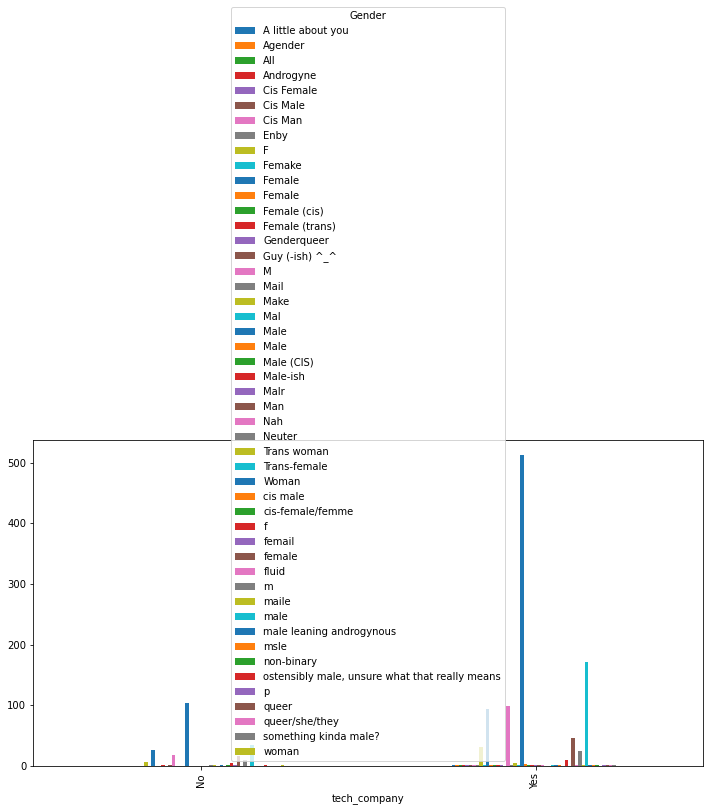

In [101]:
pd.crosstab(df['tech_company'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of the males are working in tech company/organization.
The proportion of females working in tech companies is less than males.

### Gender Vs Benefits

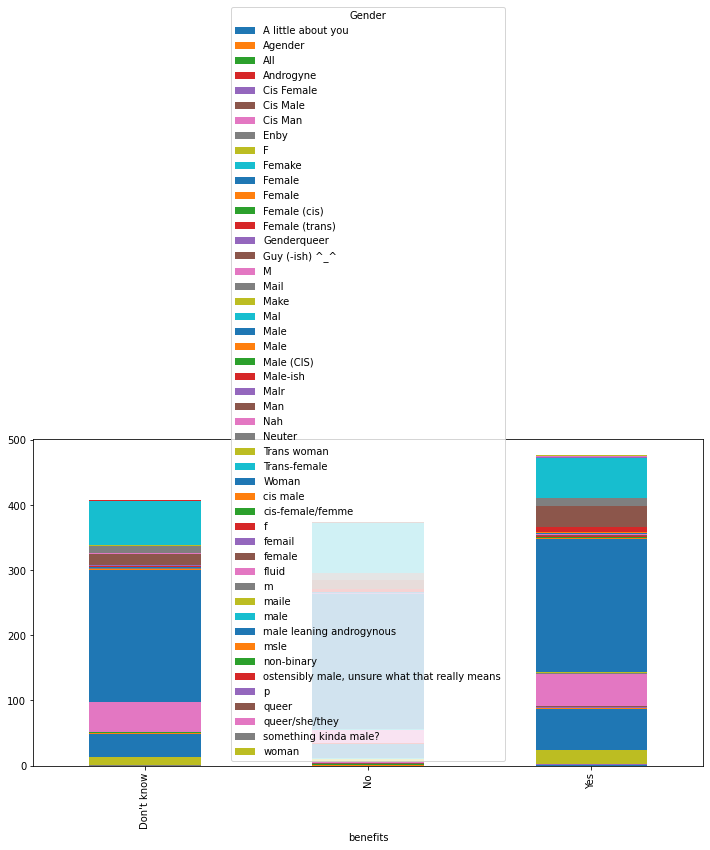

In [102]:
pd.crosstab(df['benefits'],df['Gender']).plot(kind='bar',stacked=True,figsize=(12,6))
plt.show()

Mental health benifits proportion is higher females.
<br>Ratio of males who are unaware of about the mental health benifits provided by the employer is higher.
<br>Mental health benifits provided by the employer may be gender depended.

### Gender Vs Care_options

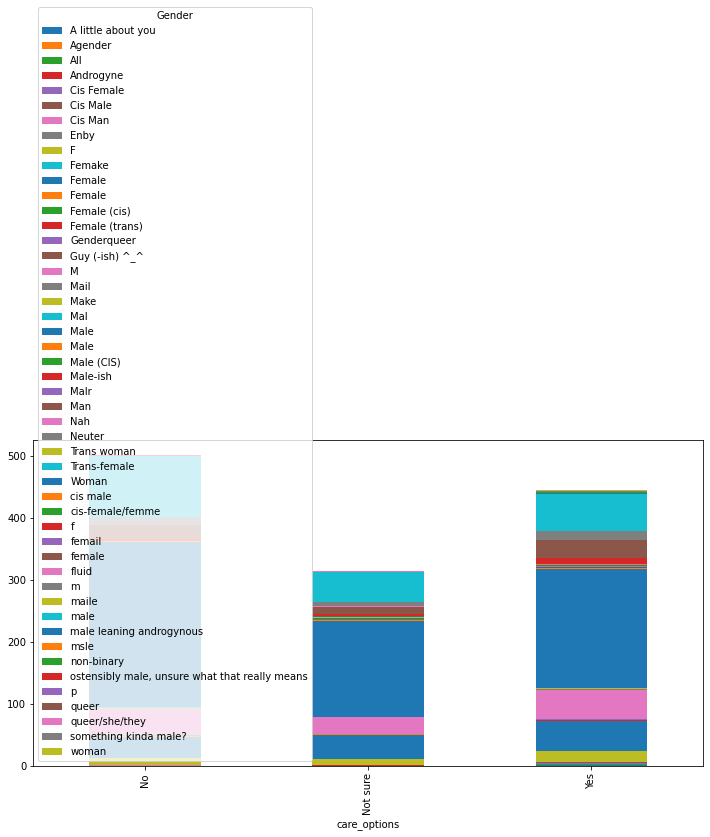

In [103]:
pd.crosstab(df['care_options'],df['Gender']).plot(kind='bar',figsize=(12,6),stacked=True)
plt.show()

Majority of the males don't know about the health care_options provided by employeer.
Comparatively higher proportion of females known about health care_options.

### Gender Vs Wellness_program

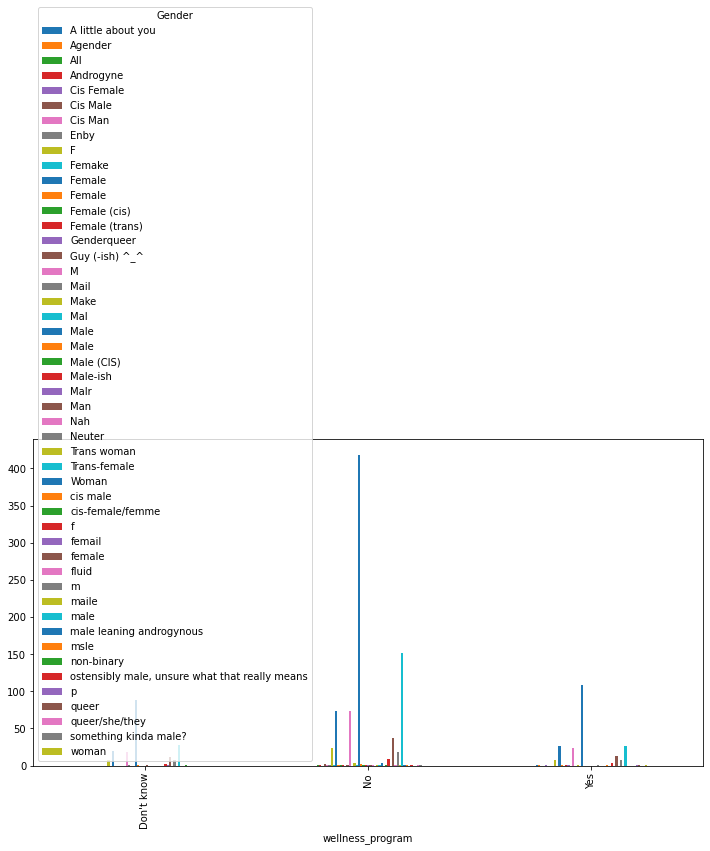

In [104]:
pd.crosstab(df['wellness_program'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt wellness program. Hence we may conclude that employer discussion
<br>on mental health as part of an employee wellness program is independent of gender.

### Gender Vs Seek_help

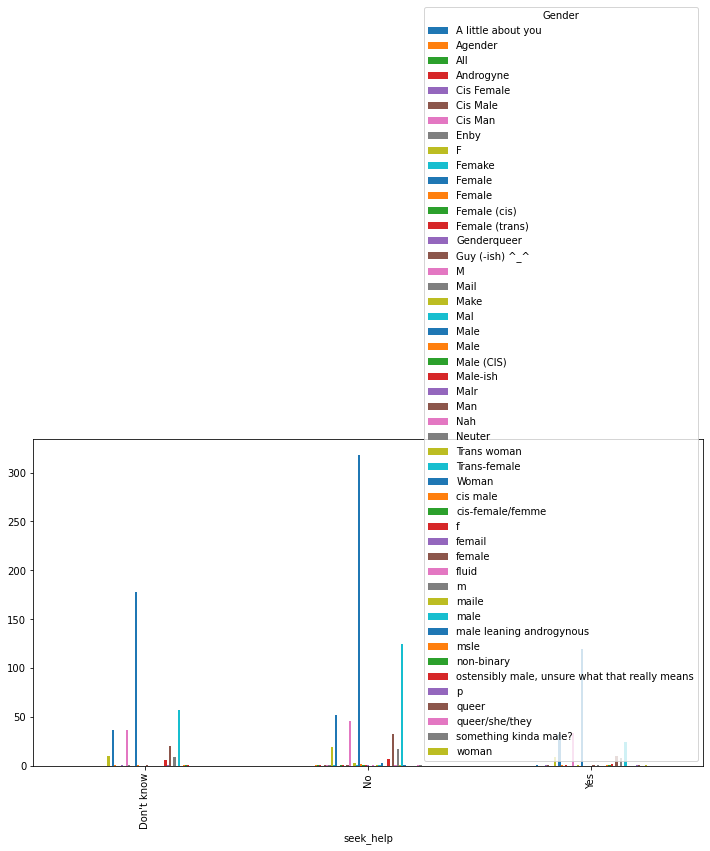

In [105]:
pd.crosstab(df['seek_help'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt seek help. Hence we may conclude that employer providing resources to learn more about mental health issues and how to seek help is independent of gender.

### Gender Vs Anonymity

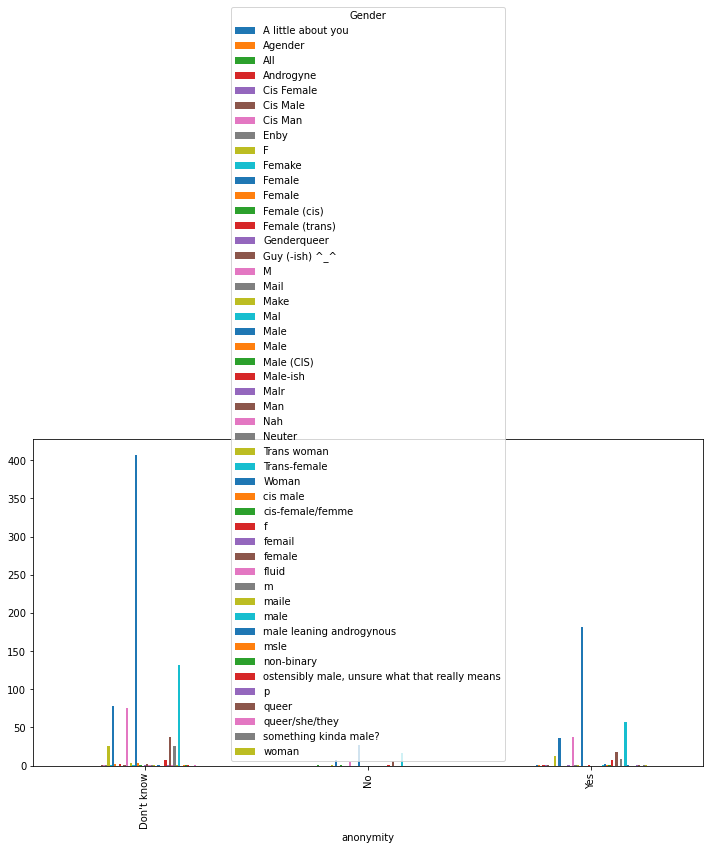

In [106]:
pd.crosstab(df['anonymity'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt anonymity. Hence we may conclude that anonymity protection
<br>if you choose to take advantage of mental health or substance abuse treat is independent of gender.

### Gender Vs Leave

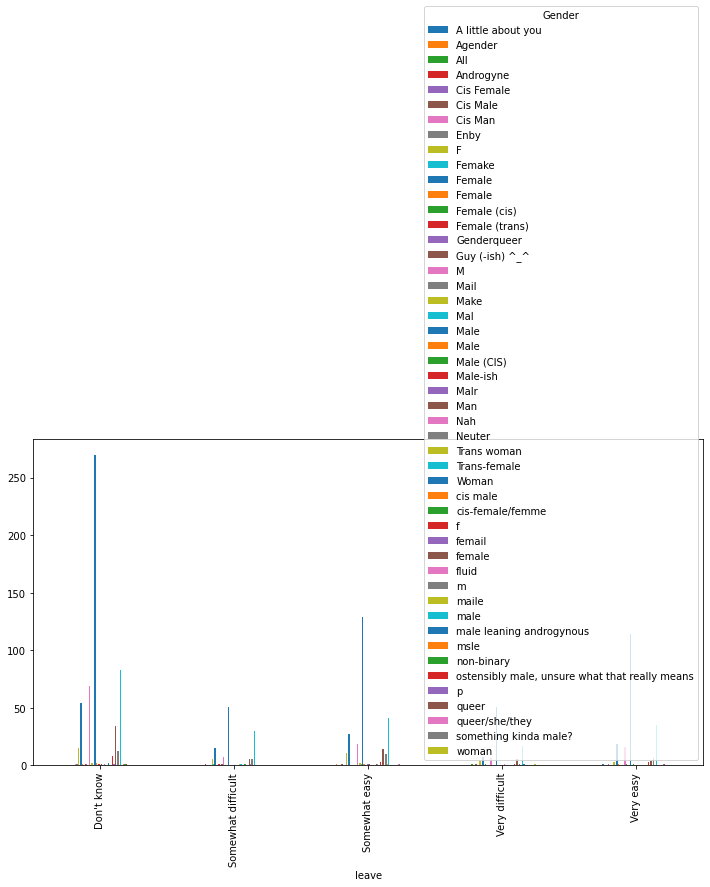

In [107]:
pd.crosstab(df['leave'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

There is no much difference in distribution of gender wrt to leave.
We may say the easy of take medical leave for a mental health condition is independent of gender

### Gender Vs Mental_health_consequence

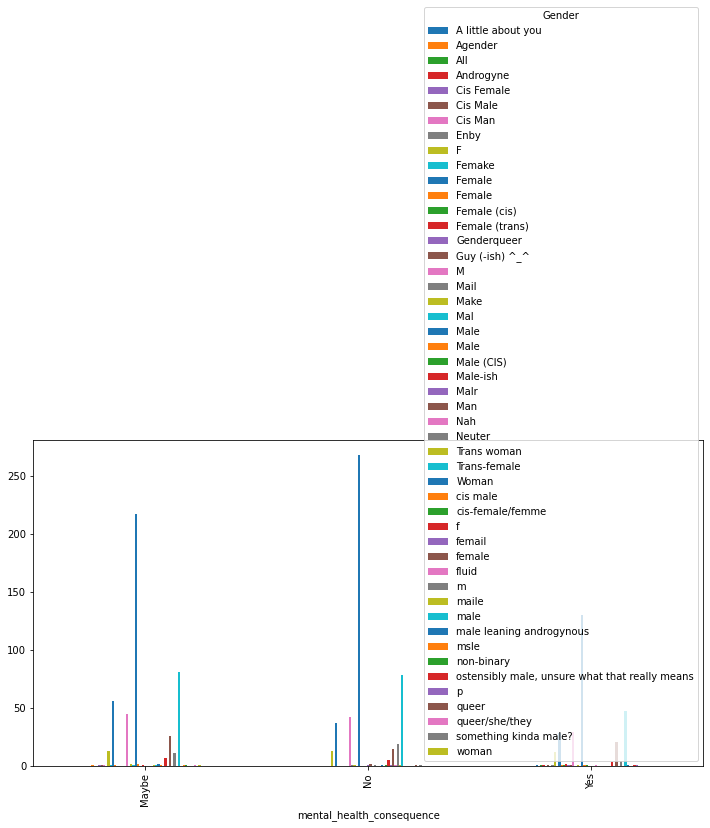

In [108]:
pd.crosstab(df['mental_health_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher no. of males think that discussing a mental health issue with your employer would not have negative consequences
<br>Higher no. of females think that discussing a mental health issue with your employer might have negative consequences

### Gender Vs Physical_health_consequence

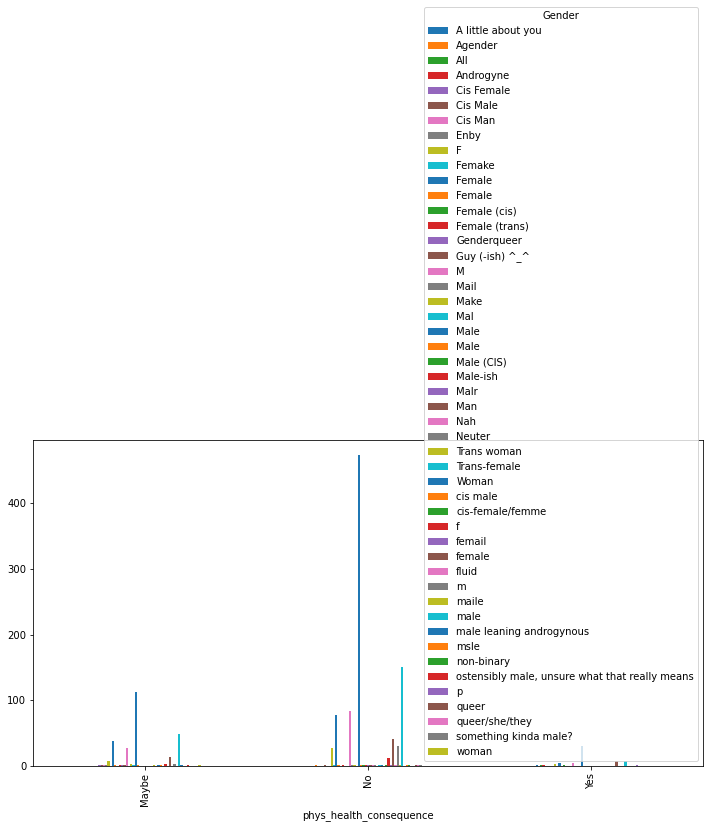

In [109]:
pd.crosstab(df['phys_health_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

In all genders, majority of the employees think that discussing a physical health issue with your employer would not have negative consequences

### Gender Vs Coworkers

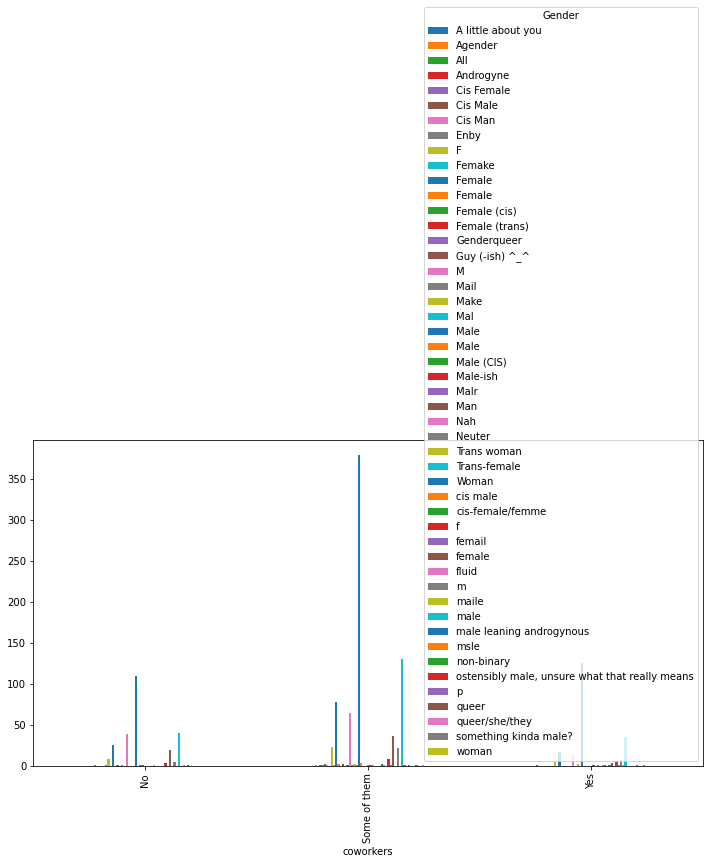

In [110]:
pd.crosstab(df['coworkers'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

All the gender employeers are mostly willing to discuss a mental health issue only with some of the coworkers.

### Gender Vs Supervisor

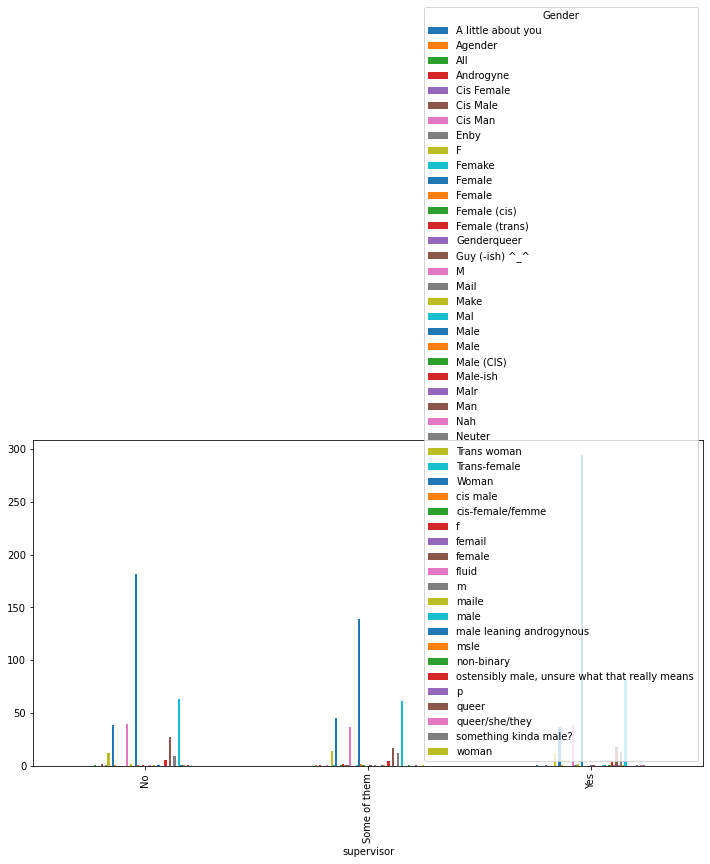

In [111]:
pd.crosstab(df['supervisor'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males are willing to discuss a mental health issue with direct supervisor(s)
<br>Proportion of females willing to discuss a mental health issue with direct supervisor(s) is less
<br>There may be gender dependency on willingness to discuss a mental health issue with direct supervisor(s)

### Gender Vs Mental_health_interview

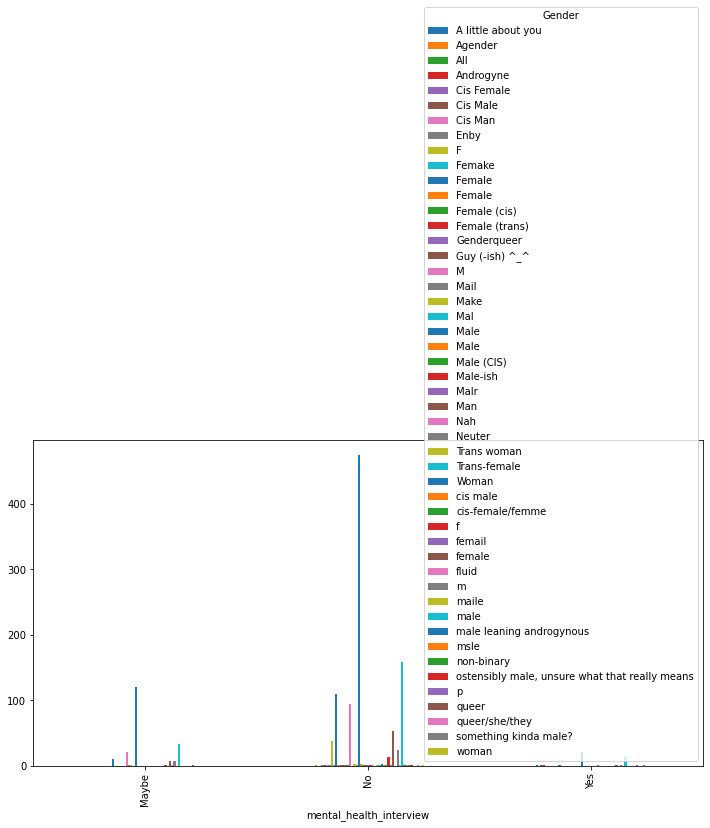

In [112]:
pd.crosstab(df['mental_health_interview'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Major no. of employees of all genders are not willing to bring up a mental health issue with a potential employer in an interview
<br>Specifically, the proportion of females are not willing to bring up a mental health issue with a potential employer
<br>in an interview,compared to other genders
<br>We may say that willingness to bring up a mental health issue with a potential employer in an interview is genders dependent.

### Gender Vs Physical_health_interview

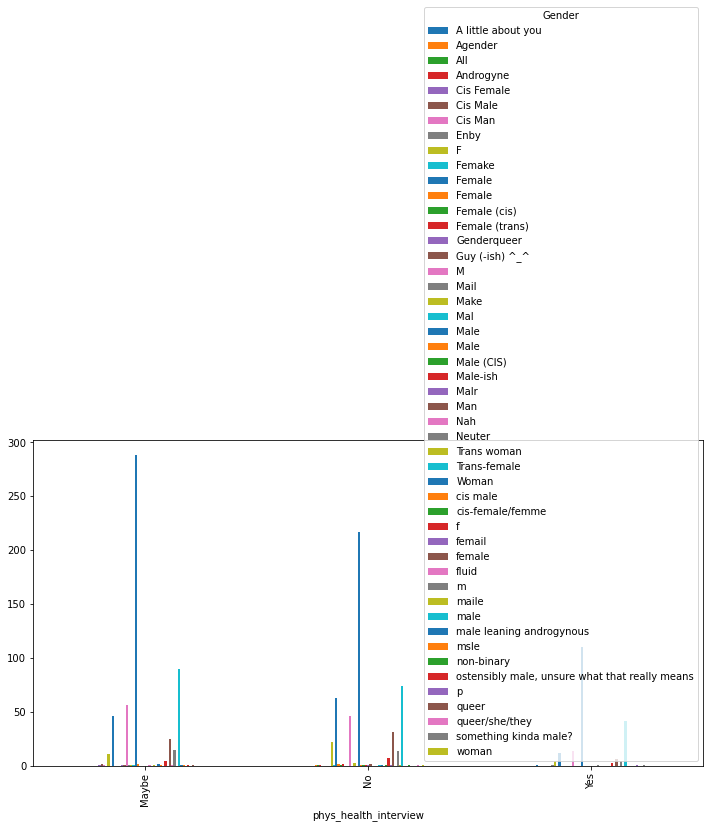

In [113]:
pd.crosstab(df['phys_health_interview'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males are open to discuss physical health issue with a potential employer in an interview
<br>Maximum no. of females are not willing to discuss physical health issue with a potential employer in an interview
<br>Minimum no. of employees of all genders are willing to discuss physical health issue with a potential employer in an interview.
<br>we may say that the willingness to discuss physical health issue with a potential employer in an interview id dependent on gender

### Gender Vs Mental_vs_Physical

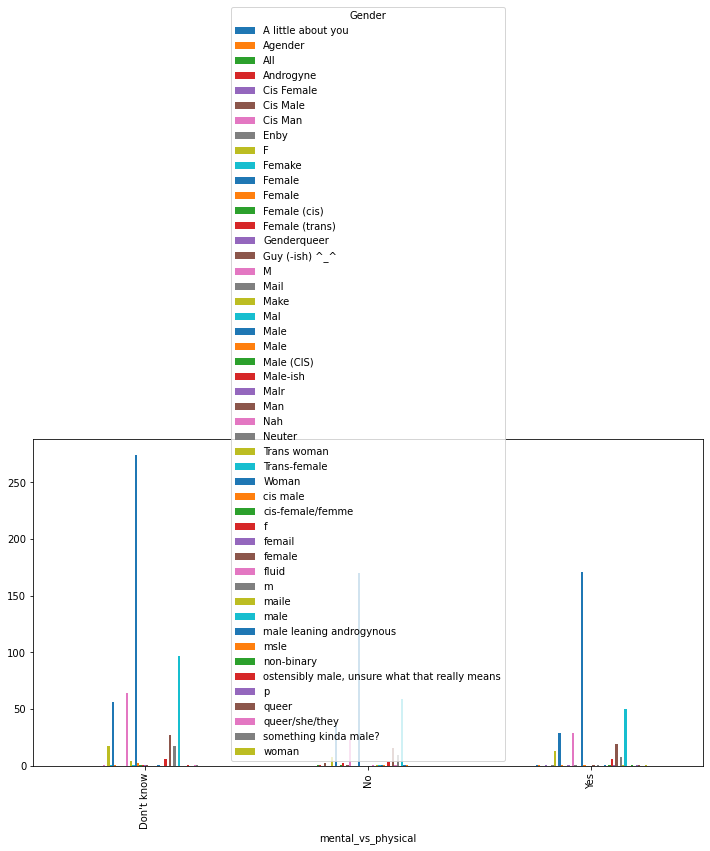

In [114]:
pd.crosstab(df['mental_vs_physical'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of males and females have don't know if their employer takes mental health as seriously as physical health.
<br> Amoung the employees who have an opinion, a slightly higher no.females feel that their employer takes mental health 
as seriously as physical health
<br>Amoung the employees who have an opinion,50% males feel that their employer takes mental health as seriously as 
physical health and remaining 50% males feels the opposite.

### Gender Vs Obeserved_consequence

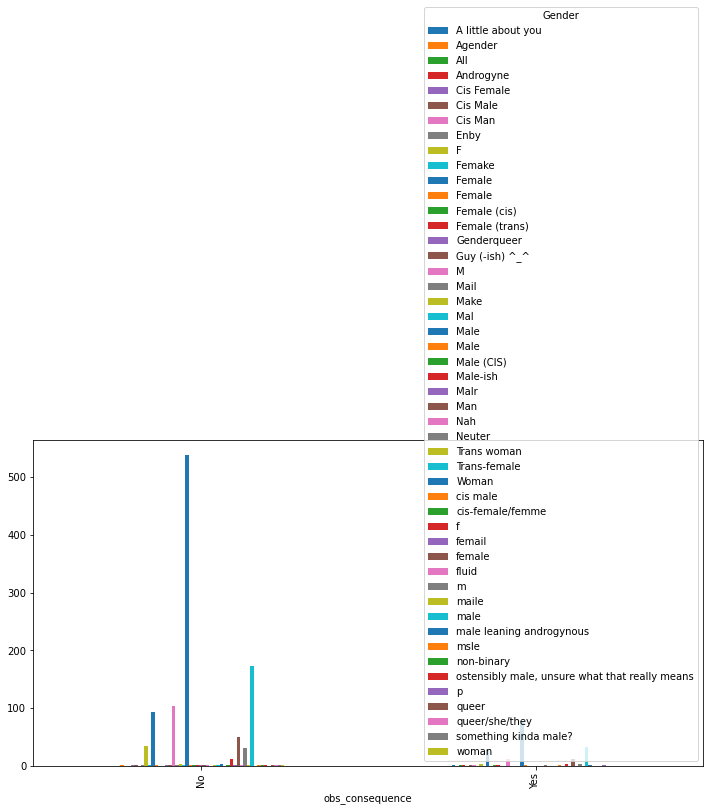

In [115]:
pd.crosstab(df['obs_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees of all genders haven't heard of or observed negative consequences for coworkers with 
mental health conditions

### family_history vs treatment

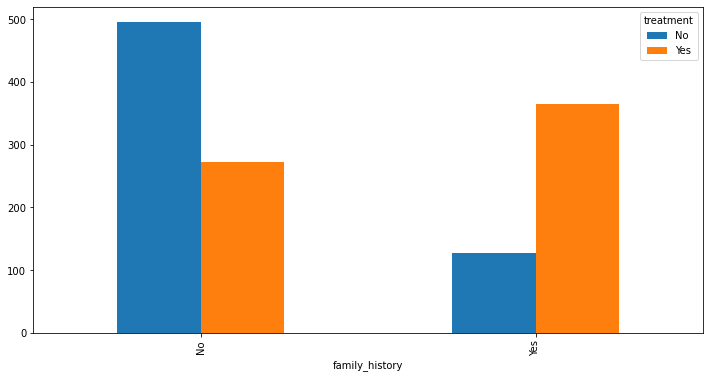

In [116]:
pd.crosstab(df["family_history"],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees with  no family history are less likely to get treament when compared to the employees with family history
<br> Majority of employees with significant margin don't have family history of health issues

### family_history vs work_interfere

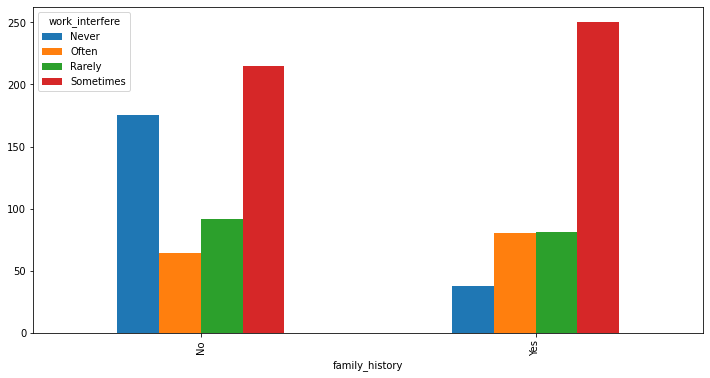

In [117]:
pd.crosstab(df["family_history"],df['work_interfere']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees with family history have their work interfered oftentimes or some times more than employees with out family history
<br>Employees without family history are more likely to don't have their work interfered ever 

### family_history vs mental_health_consequence

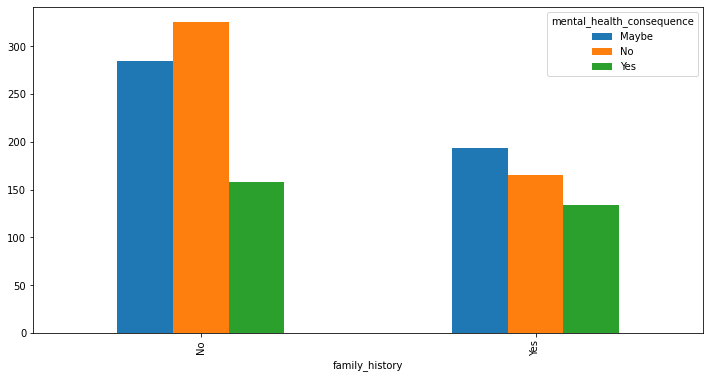

In [118]:
pd.crosstab(df["family_history"],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

A higher proportion of employees with no family history that discussing a mental health issue with your employer 
would not have negative consequences.
<br>Unlike employees with family history, a higher proportion think that discussing a mental health issue with your employer 
might have negative consequences

### family_history vs phys_health_consequence

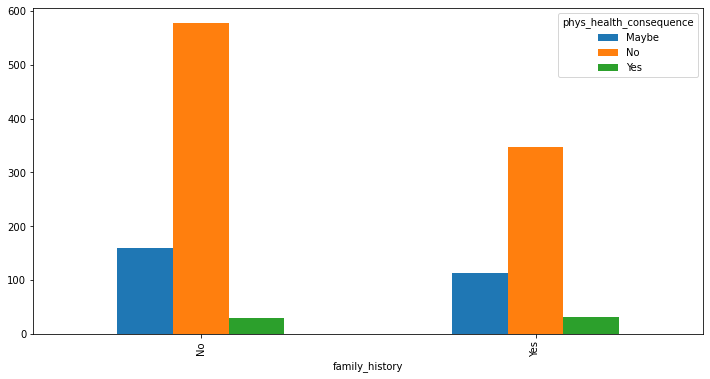

In [119]:
pd.crosstab(df["family_history"],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

discussing a physical health issue with your employer is not affect by family history 

### family_history vs coworkers

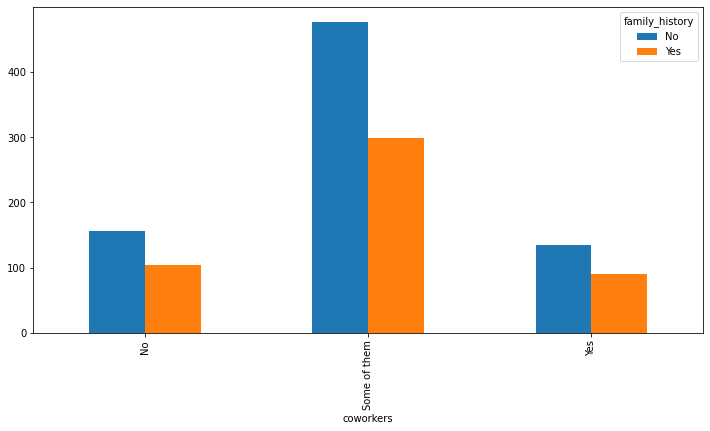

In [120]:
pd.crosstab(df['coworkers'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

willing to discuss a mental health issue with coworkers is independent of employees family history

### family_history vs supervisor

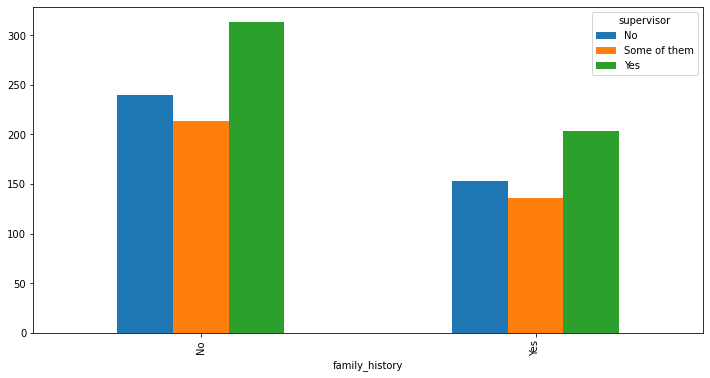

In [121]:
pd.crosstab(df["family_history"],df['supervisor']).plot(kind='bar',figsize=(12,6))
plt.show()

willingness to discuss a mental health issue with direct supervisor(s) is independent of family history of employee

### family_history vs mental_health_interview

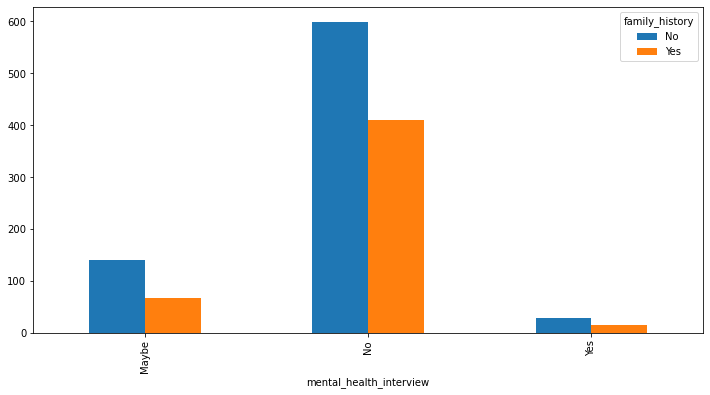

In [122]:
pd.crosstab(df['mental_health_interview'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

bringing up a mental health issue with a potential employer in an interview is independent of family history

### family_history vs phys_health_interview

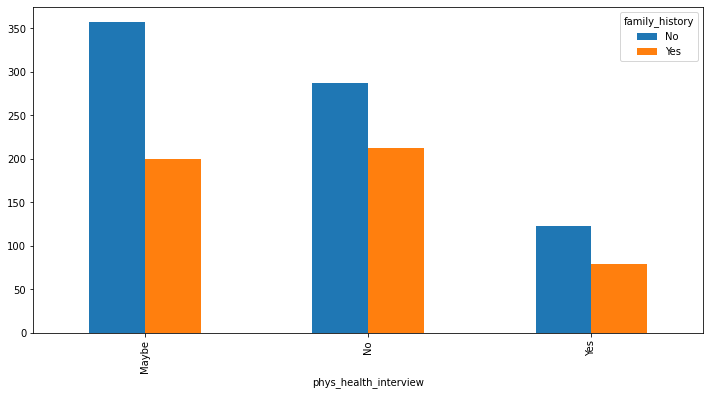

In [123]:
pd.crosstab(df['phys_health_interview'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

bringing up a physical health issue with a potential employer in an interview is independent of family history

### family_history vs mental_vs_physical

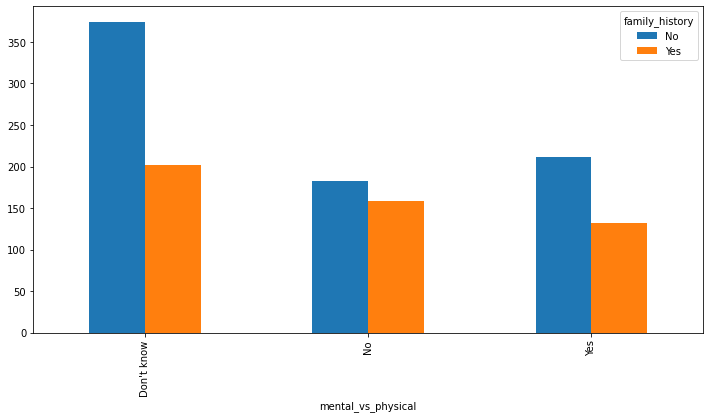

In [124]:
pd.crosstab(df['mental_vs_physical'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

minimum no. employees with family history feel that your employer takes mental health as seriously as physical health

### treatment vs work_interfere

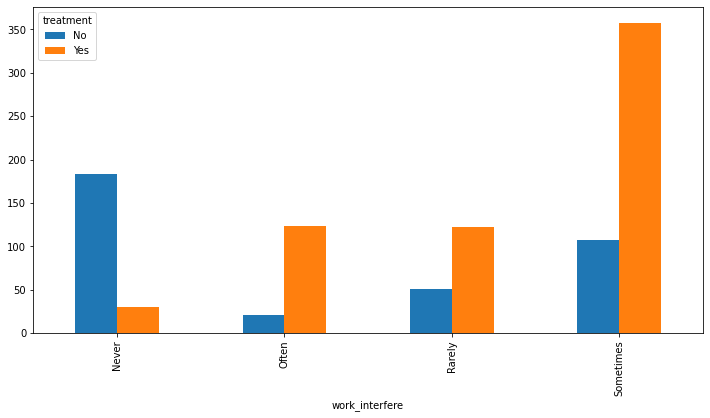

In [125]:
pd.crosstab(df['work_interfere'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for a mental health condition, find some kind of work interference because of mental health condition

### treatment vs remote_work

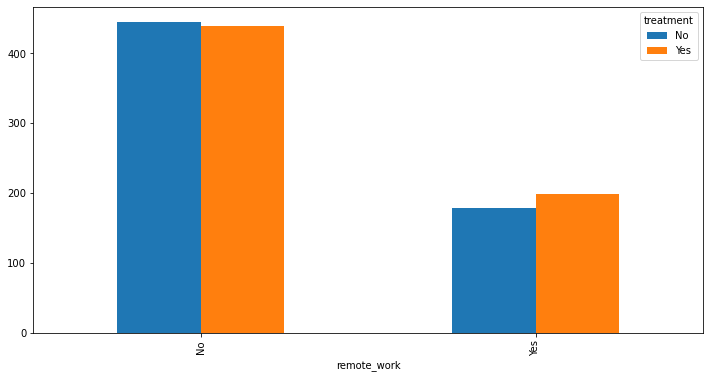

In [126]:
pd.crosstab(df['remote_work'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees are not working remotely.
<br>Amoung the employees working remotely, slightly higher no. of them have sought treatment for a mental health condition

### treatment vs mental_health_consequence

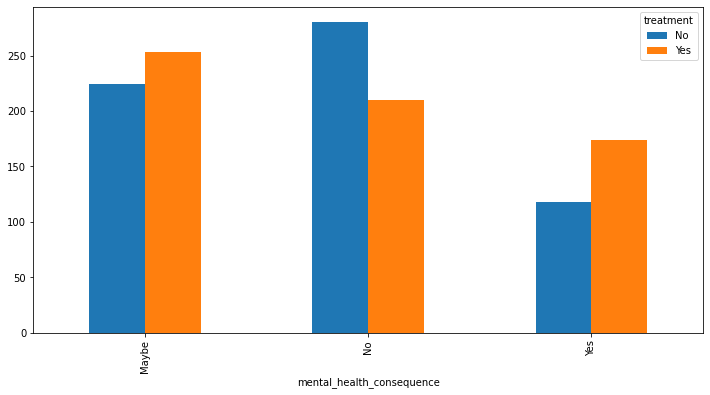

In [127]:
pd.crosstab(df['mental_health_consequence'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for mental health condition think that discussing a mental health issue with your employer 
would have negative consequences than employees who have not sought treatment

### treatment vs phys_health_consequence

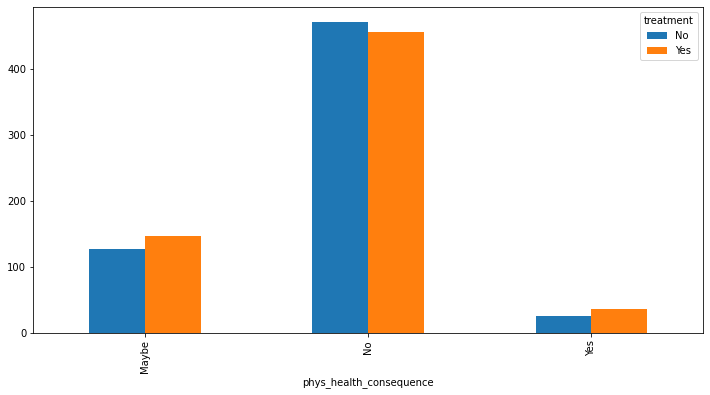

In [128]:
pd.crosstab(df['phys_health_consequence'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have not sought or sought treatment think that discussing a physical health issue with your 
employer wouldnot have negative consequences
<br>Amoung the employees who thing think that discussing a physical health issue with your employer would have negative
consequences, ratio  of employees who have sought treatment are higher

### treatment vs coworkers

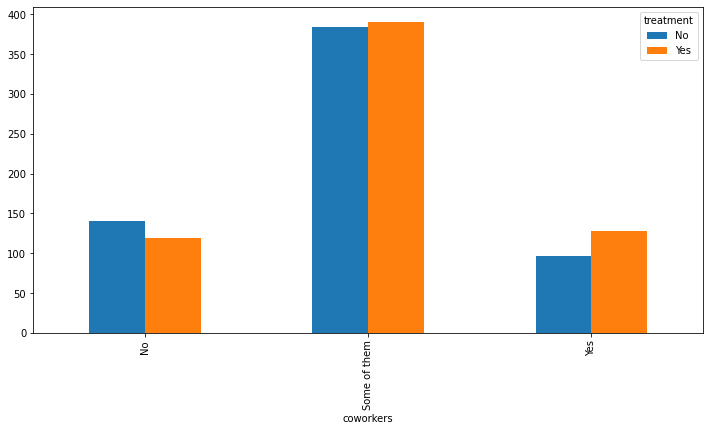

In [129]:
pd.crosstab(df['coworkers'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who have sought their treatment are willing to discuss a mental health issue with your coworkers as compared to who have not sought their treatment.
<br> both employees who have sought or not sought treatment are willing to discuss a mental health issue with your coworkers

### treatment vs leave

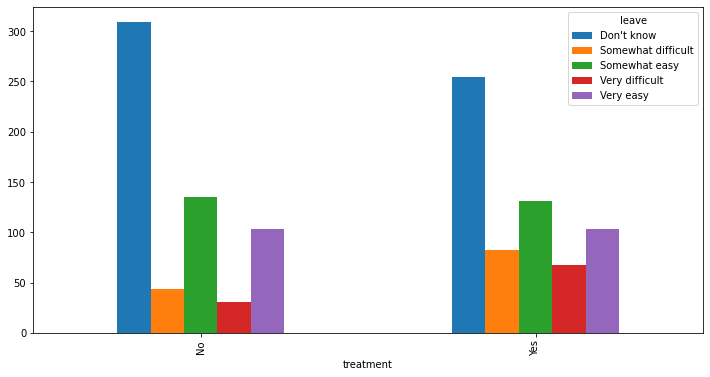

In [130]:
pd.crosstab(df['treatment'],df['leave']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have not sought treatment dont know about leaves provided for mental health condition
<br> More no. Employees who have sought their treatment found somewhat or very difficult to apply medical leave for mental health condition

### treatment vs mental_health_interview

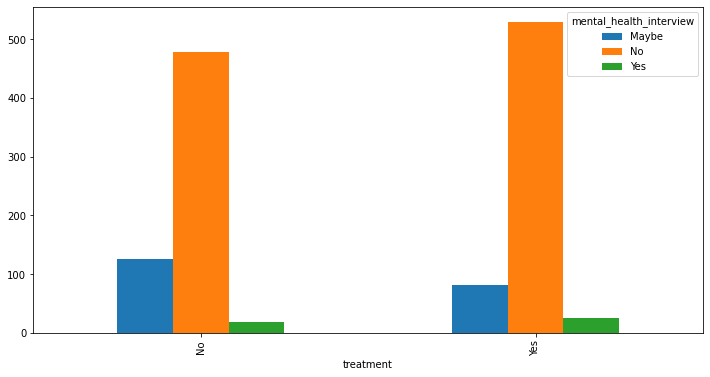

In [131]:
pd.crosstab(df['treatment'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have sought their treatment are not willing to bring up a mental health issue with a potential employer in an interview
<br>Employees who have  not sought their treatment might not bring up a mental health issue with a potential employer in an interview

### treatment vs supervisor

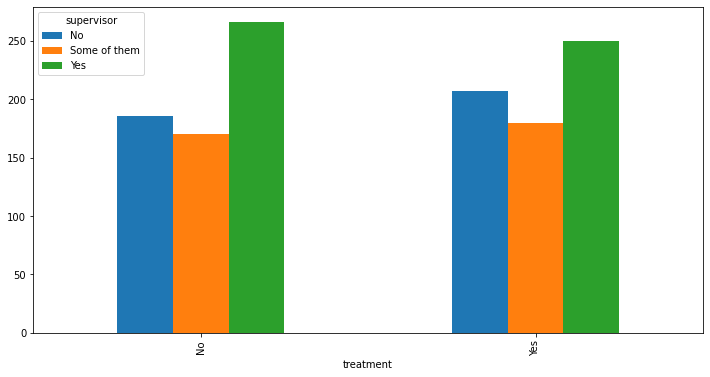

In [132]:
pd.crosstab(df['treatment'],df['supervisor']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employyes who have not sought their treatment are willing to discuss a mental health issue with your direct supervisor
<br>Majority of employyes who have sought their treatment are not willing to discuss a mental health issue with your direct supervisor

### treatment vs phys_health_interview

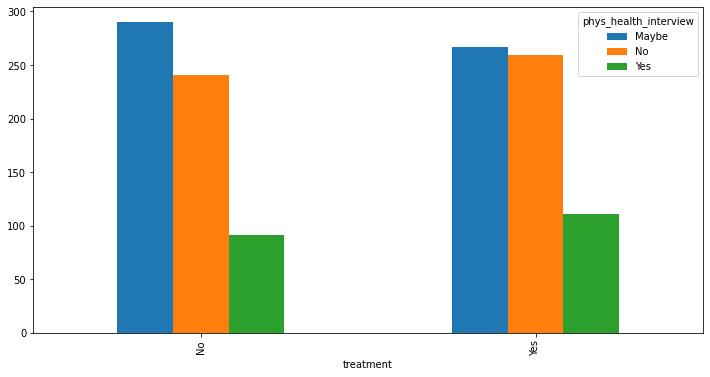

In [133]:
pd.crosstab(df['treatment'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for mental health conditions are not willing to discuss physical health issue with a
potential employer in an interview

### treatment vs mental_vs_physical

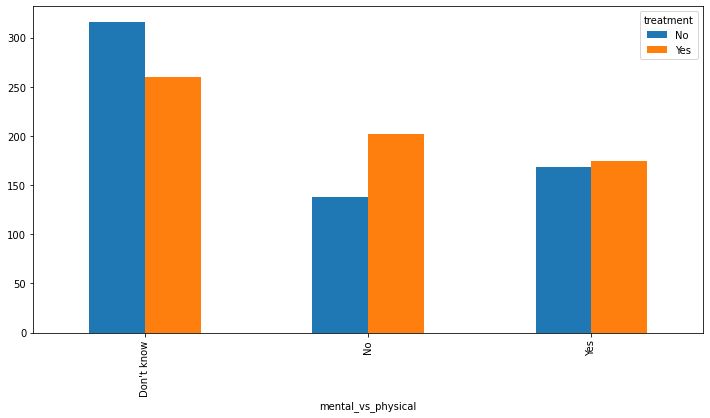

In [134]:
pd.crosstab(df['mental_vs_physical'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher proportion of employees who have sought treatment think that their employer donot takes mental health as seriously as physical health

### remote_work vs benefits

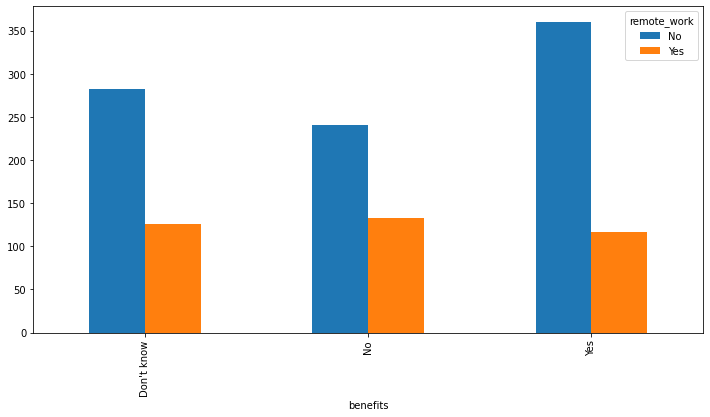

In [135]:
pd.crosstab(df['benefits'],df['remote_work']).plot(kind='bar',figsize=(12,6))
plt.show()

from above we say that the people who does not do remote work were high in number compare to people who does the remote work.
people who does not do remote work were more aware about the benifits.
<br>there is around 30% people who does the remote work knows about benifits.
<br>so we can say that people who does not do remote work were more aware about the benifits than others.

### remote_work vs mental_vs_physical

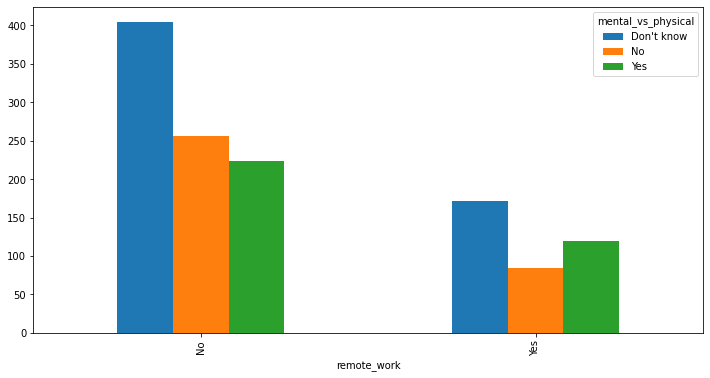

In [136]:
pd.crosstab(df['remote_work'],df['mental_vs_physical']).plot(kind='bar',figsize=(12,6))
plt.show()

For employees who work remotely, think that their employer takes mental health as seriously as physical health.
which is not the case for non-remote type of work.

### remote_work vs mental_health_consequence

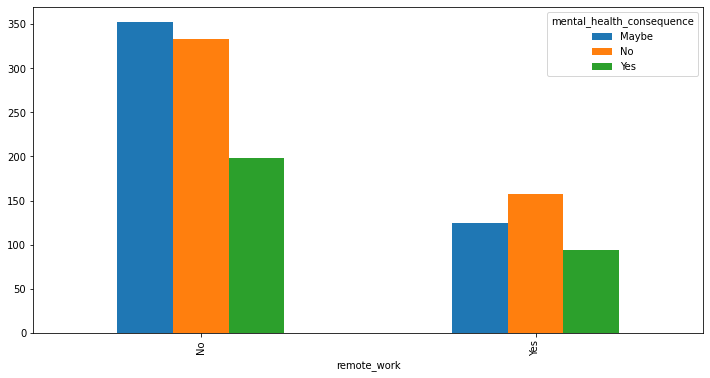

In [137]:
pd.crosstab(df['remote_work'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who work remotely, think that discussing a mental health issue with your employer would not have 
negative consequences unlike employees who work non-remote. 

### remote_work vs phys_health_consequence

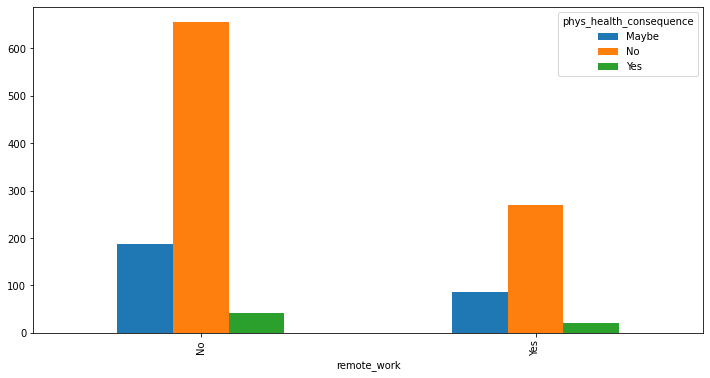

In [138]:
pd.crosstab(df['remote_work'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees opinion on discussing a physical health issue with your employer having negative consequences is not affected by remote work.

### remote_work vs mental_health_interview


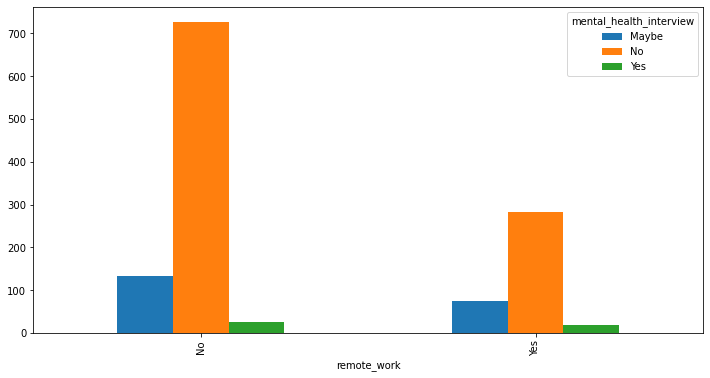

In [139]:
pd.crosstab(df['remote_work'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Openess to bring up a mental health issue with a potential employer in an interview is independent of work type(remote or not ).

### remote_work vs phys_health_interview

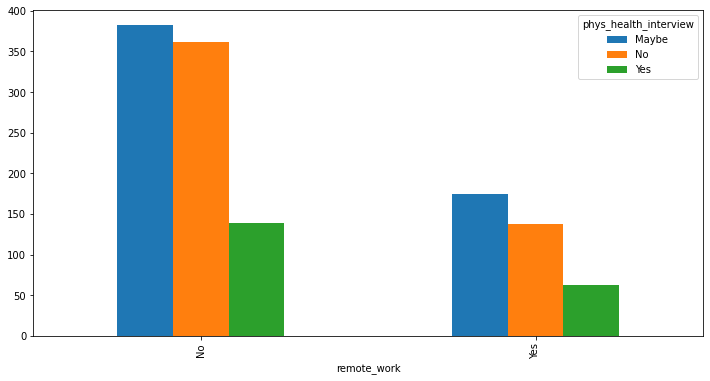

In [140]:
pd.crosstab(df['remote_work'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Openess to bring up a physical health issue with a potential employer in an interview is independent of work type(remote or not ).

In [141]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Self employed vs remote work

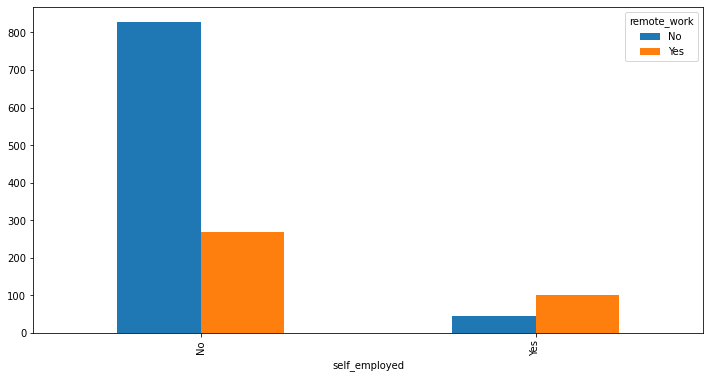

In [142]:
pd.crosstab(df['self_employed'],df['remote_work']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher ratio of people who are self employeed are working remotely
<br>from above we can say that people who are not self employed are not working remotely.

### Self employeed vs mental health consequences

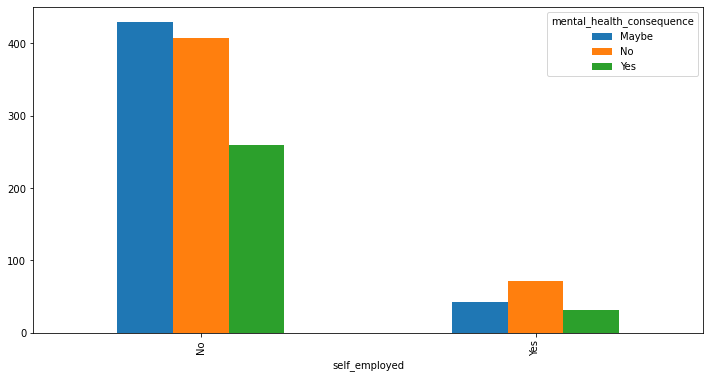

In [143]:
pd.crosstab(df['self_employed'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher proportion of people who are self employed,think that discussing a mental health issue with your employer wouldnot
have negative consequences

### Self employeed vs physical health consequences

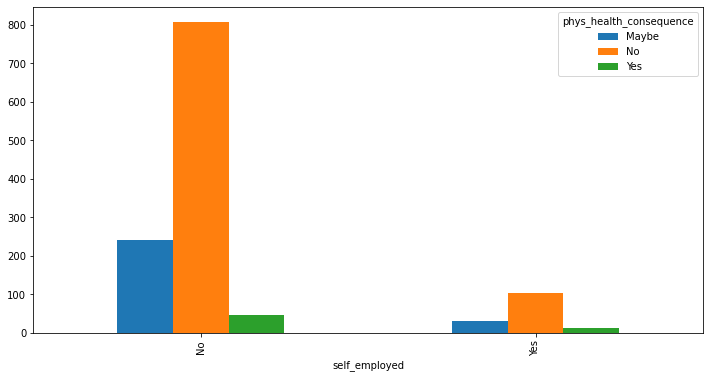

In [144]:
pd.crosstab(df['self_employed'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Discussing a physical health issue with your employer is independent of employement type(Self or not)

### Self employeed vs physical health interview

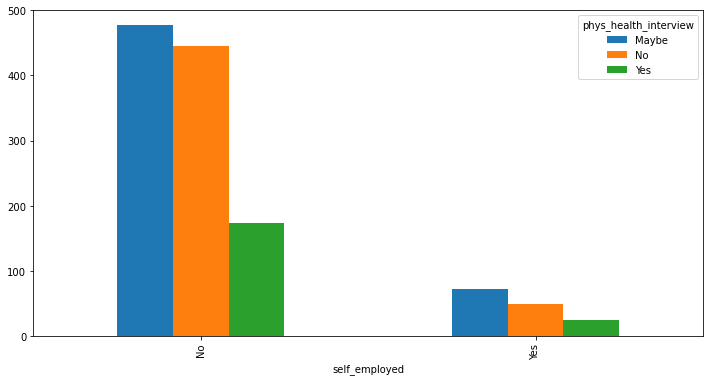

In [145]:
pd.crosstab(df['self_employed'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

openess bring up a mental health issue with a potential employer in an interview is independent of employement type(Self or not)

### Self employeed vs mental health interview

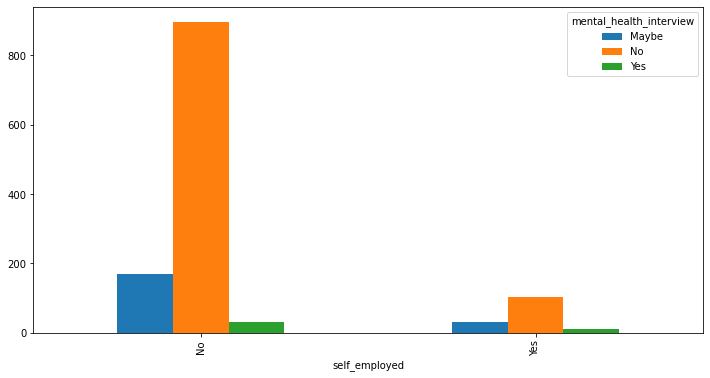

In [146]:
pd.crosstab(df['self_employed'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of people are not willing to u bring up a physical health issue with a potential employer in an interview 
irrespective of employement type(self or not)

### Self employeed vs Mental vs Physical

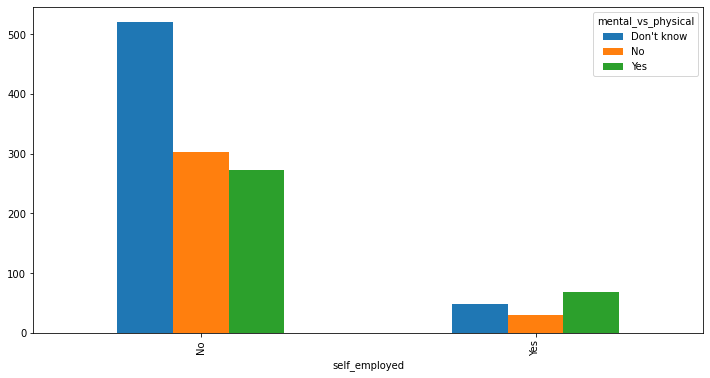

In [147]:
pd.crosstab(df['self_employed'],df['mental_vs_physical']).plot(kind='bar',figsize=(12,6))
plt.show()

A higher proportion of people who are self employeed feel that your employer takes mental health as seriously as physical health.
Which is not the case for people who are not self employeed.

### co workers vs mental health consequences

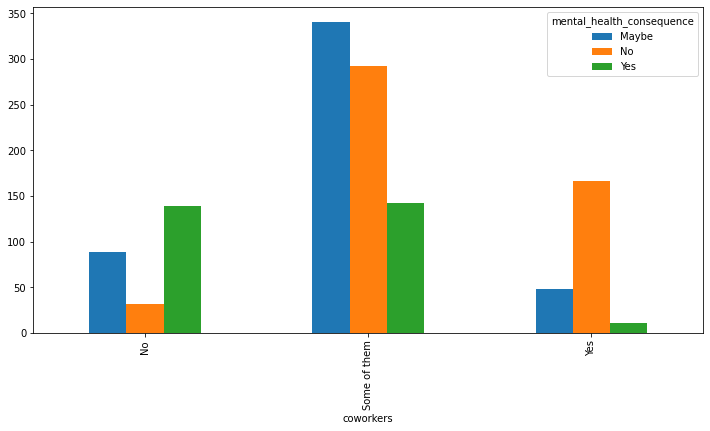

In [148]:
pd.crosstab(df['coworkers'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of employees willing to discuss a mental health issue with coworkers are not willing bring up a 
mental health issue with a potential employer in an interview

### Coworkers vs Physical health consequences

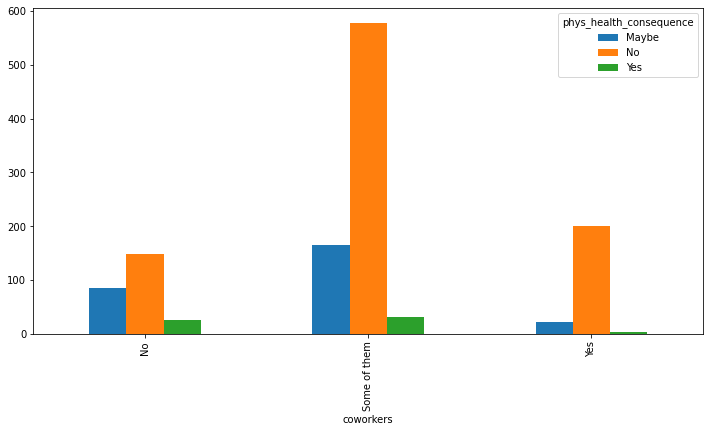

In [149]:
pd.crosstab(df['coworkers'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Irrespective of willingness to discuss a mental health issue with coworkers, employees opinion on discussing a 
physical health issue with employer is the same.

### Coworkers vs Phy_health_interview

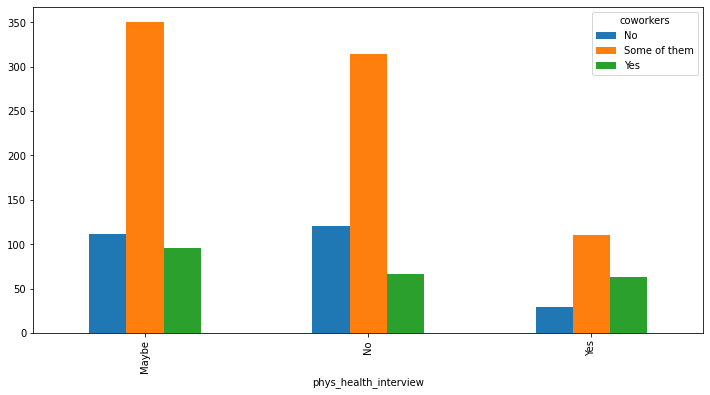

In [150]:
pd.crosstab(df['phys_health_interview'],df['coworkers']).plot(kind='bar',figsize=(12,6))
plt.show()

The ratio of employees willinging to discuss a mental health issue with coworkers and employees willinging to bring up a 
physical health issue with a potential employer in an interview is slightly higher.

### Coworker vs mental health interview

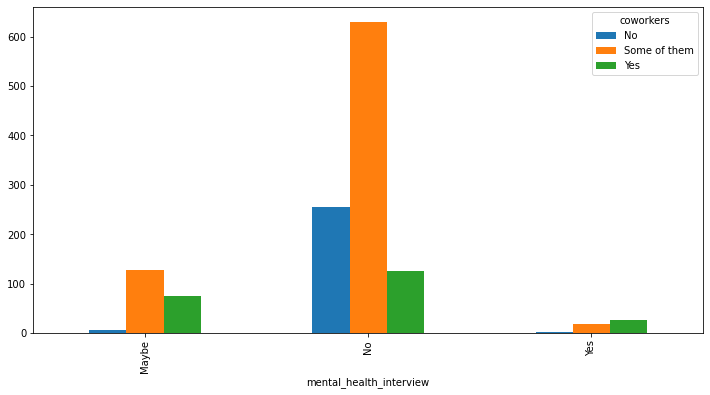

In [151]:
pd.crosstab(df['mental_health_interview'],df['coworkers']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher ratio of employees who willinging to discuss a mental health issue with coworkers are also willinging to bring up  
physical health issue with a potential employer in an interview.

## Multi Variant Analysis

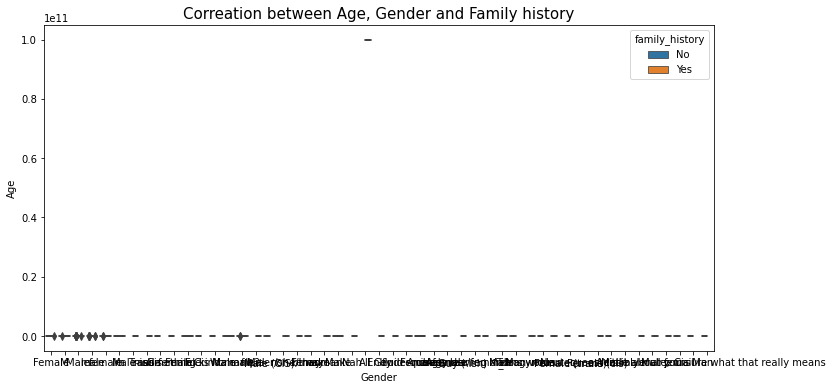

In [152]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Gender'],y=df['Age'],hue=df['family_history'])
plt.title('Correation between Age, Gender and Family history',fontsize=15)
plt.show()

The average age of females who have family history is less than the average age of females who have family history.
The average age of males and other gender who have family history is greater than the average age of females who have family history.

### Does gender and family history have effect on treatment ?

Higher number of females with family history are undergoing treatement for mrntal health condition.Highest number of males with no family history are not undergoing treatment.
Looks like gender and family history may have effect on treatment.

A very small count of employees of all genders who are undergoing treatment, feel that their mental health condition never interferes with work.
Most of the employees of all genders who are undergoing treatment, have experienced some sort of work interference. 

In [209]:
df=pd.read_csv('survey.csv')

In [210]:
df['Gender'] = df['Gender'].replace({'male':'Male','M':'Male','m':'Male','Make':'Male','Man':'Male','Malr':'Male',
                'Male (CIS)':'Male','Male ':'Male','Cis Male':'Male','Mail':'Male','Cis Male':'Male','cis male':'Male',
                'msle':'Male','Cis Man':'Male','maile':'Male','Mal':'Male',
                'female':'Female','F':'Female','f':'Female','Woman':'Female','Femake':'Female','Female ':'Female',
                'femail':'Female', 'Female (cis)':'Female','woman':'Female','cis-female/femme':'Female','Cis Female':'Female',
                'Female (trans)':'Others','Androgyne':'Others','queer':'Others','Neuter':'Others',
                'Trans woman':'Others','fluid':'Others','non-binary':'Others','queer/she/they':'Others','Enby':'Others',
                'Trans-female':'Female','Genderqueer':'Others','Agender':'Others','something kinda male?':'Others','Male-ish':'Others','ostensibly male, unsure what that really means':'Others',
                'Nah':'Others','Guy (-ish) ^_^':'Others','male leaning androgynous':'Others','A little about you':'Others'})

### OUTLIERS TREATMENT 

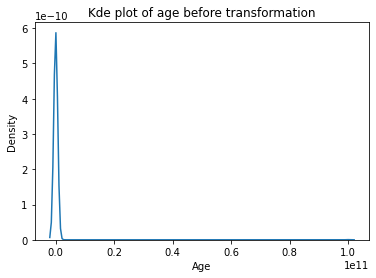

In [211]:
sns.kdeplot(x=df['Age'])
plt.title('Kde plot of age before transformation')
plt.show()

There are outliers present in the variable age. Reducing the skewness by using boxcox transformation.

In [271]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
age_out = df[(df['Age']<LL)|(df['Age']>UL)].index
df.drop(index=age_out,axis=0,inplace=True)

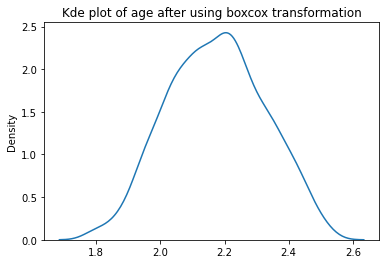

In [272]:
box_age = stats.boxcox(df['Age'])
sns.kdeplot(box_age[0])
plt.title('Kde plot of age after using boxcox transformation')
plt.show()

In [273]:
print('The skewness of age after transformation',stats.skew(box_age[0]))

The skewness of age after transformation -0.00678159222075925


The age curve looks almost normal after boxcox transformation and the skewness of the age has been reduced to 0.0005 which is almost normal distribution 

In [274]:
df['Age'] = box_age[0]

# Missing Value

In [275]:
null_df = pd.DataFrame()
null_df['Count'] = df.isnull().sum()
null_df['Percent'] = null_df['Count']/len(null_df)
null_df[null_df['Percent']!=0].sort_values('Percent',ascending=False)

Empty DataFrame
Columns: [Count, Percent]
Index: []

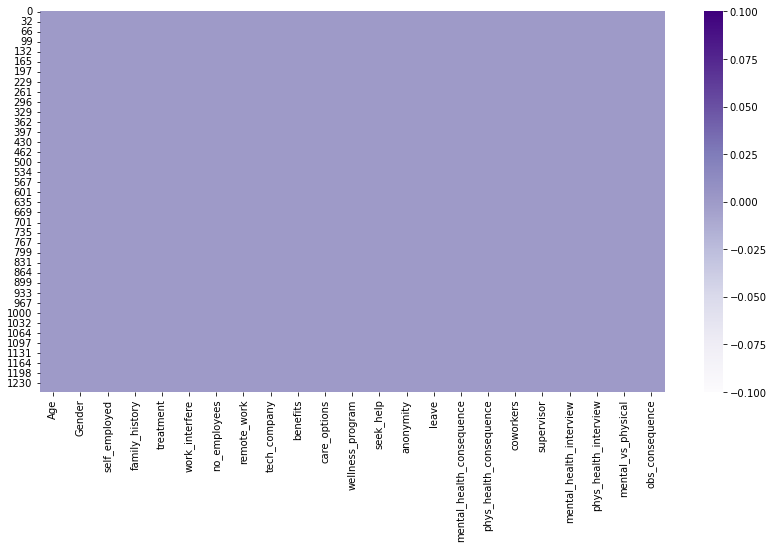

In [276]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),cmap='Purples')
plt.show()

### Imputing missing values with mode 

In [277]:
df.self_employed.value_counts()

No     1077
Yes     135
Name: self_employed, dtype: int64

In [278]:
wi_freq_value = df.work_interfere.mode() 
df['work_interfere'].fillna(wi_freq_value[0],inplace=True)

In [279]:
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

In [280]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [281]:
# No missing values

### Statistical test to see if Mental health issues is related to country

In [282]:
# Considering only US, UK and Canada countries to analysis the effect of country on mental health

In [225]:
df_c.shape

(974, 27)

In [285]:
from scipy.stats import chi2_contingency

Hypothesis<br>
H0: Mental health treatment is indepedent on country<br>
H1: Mental health traetment is dependent on country

In [226]:
df1=df_c.drop(['treatment','Age','state'],axis=1)
df1.isnull().sum()

Timestamp                      0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     847
dtype: int64

In [286]:
pvalscore=pd.DataFrame()
pvalscore['teststat']=''
pvalscore['p_val']=''
pvalscore['variable']=''
m=0

In [287]:
pvalscore

Empty DataFrame
Columns: [teststat, p_val, variable]
Index: []

In [288]:
import scipy

In [290]:
df1=df.drop('treatment',axis=1)

In [291]:
for i in df1.columns:
    table = pd.crosstab(df[i],df['treatment'])
    obs_val = table.values
    test_stat,p,dof,exp_val =scipy.stats.chi2_contingency(obs_val)
    print(p)

0.7839908931451938
3.1561657528552145e-12
0.5295230527180872
3.291761030346723e-39
1.7583973023894851e-43
0.08970859319860758
0.40522101169339075
0.25778556273055636
2.527851122222036e-14
1.978336123362424e-21
0.012818803391256323
0.011097444525358704
1.5040457371558682e-06
2.5098916198113158e-06
6.905495325639761e-05
0.4902502850683861
0.05138060664779601
0.4285074016559942
0.004142786103170013
0.28424179828054275
0.00014682386241204372
4.5736731544056484e-07


In [292]:
pd.options.display.float_format = '{:.6f}'.format

In [293]:
for i in df1.columns:
    table = pd.crosstab(df[i],df['treatment'])
    obs_val = table.values
    test_stat,p,dof,exp_val =scipy.stats.chi2_contingency(obs_val)
    pvalscore=pvalscore.append({'variable':i,'teststat':test_stat,'p_val':p},ignore_index=True)

In [296]:
psc=pvalscore.sort_values('p_val',ascending=True)
psc.reset_index(inplace=True)
ps=psc.drop('index',axis=1)
ps2


teststat    p_val                   variable
0  201.758843 0.000000             work_interfere
1  171.610493 0.000000             family_history
2   95.344062 0.000000               care_options
3   62.617643 0.000000                   benefits
4   52.963326 0.000000                     Gender
5   25.435734 0.000000            obs_consequence
6   26.814704 0.000002                  anonymity
7   31.422719 0.000003                      leave
8   19.161216 0.000069  mental_health_consequence
9   17.652554 0.000147         mental_vs_physical
10  10.972773 0.004143    mental_health_interview
11   9.002081 0.011097                  seek_help
12   8.713684 0.012819           wellness_program
13   5.936989 0.051381                  coworkers
14   9.529800 0.089709               no_employees

In [297]:
ps2=ps.head(14)
val=list(ps2['variable'])
val

['work_interfere',
 'family_history',
 'care_options',
 'benefits',
 'Gender',
 'obs_consequence',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'mental_vs_physical',
 'mental_health_interview',
 'seek_help',
 'wellness_program',
 'coworkers']

In [234]:
import dataframe_image as dfi
dfi.export(ps2, 'sta1.png')

Here p-value is greater than 0.01. Hence we fail to reject null hypothesis and we can counclude that<br>
Mental health issue treatment is independed on country.<br>
(Note: Considering only US, UK and Canada)

But here we are droping country column as the no. of entries in the each country is not sufficient and it effects the model(most of the countries have only 1 entry).  This affects the model significantly. 

In [199]:
df.drop('Country',axis=1,inplace=True)

KeyError: "['Country'] not found in axis"

### Statistical test to see if Mental health issues is related to gender

Hypothesis<br>
H0: Mental health issue is indepedent on gender<br>
H1: Mental health issue is dependent on gender

In [198]:
gender_MH_table = pd.crosstab(df['Gender'],df['treatment'])
gender_MH_table

treatment   No  Yes
Gender             
Female      77  169
Male       525  430
Others       3   15

In [202]:
val

['work_interfere',
 'family_history',
 'care_options',
 'benefits',
 'obs_consequence',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'Gender',
 'mental_vs_physical',
 'mental_health_interview',
 'seek_help',
 'Country',
 'wellness_program',
 'coworkers']

In [201]:
df=df[]

KeyError: "['Country'] not in index"

In [ ]:
obs_val = gender_MH_table.values
alpha = 0.05
test_stat,p,dof,exp_val = chi2_contingency(obs_val)
print('p-value :',p)
print('Test Statistics :',test_stat)

Here p-value is less than 0.05. Hence we reject null hypothesis and we can counclude that Mental health issue treatment is depended on gender.

### Statistical test to see if Mental health treatment has impact on work interference.

Hypothesis<br>
H0: Mental health treatment is indepedent on work interference<br>
H1: Mental health treatment is dependent on work interference

In [ ]:
work_int_table = pd.crosstab(df['work_interfere'],df['treatment'])
work_int_table

In [ ]:
obs_val = work_int_table.values
alpha = 0.05
test_stat,p,dof,exp_val = chi2_contingency(obs_val)
print('p-value :',p)
print('Test Statistics :',test_stat)

Here p-value is less than 0.05. Hence we reject null hypothesis and we can counclude that Mental health treatment has impact on work interference.

### Statistical test to see if Age has impact on Mental health

In [ ]:
# To test the normality of Age variable
stat, p_value = stats.shapiro(df['Age'])

print('p-value:', p_value)

Here p-value<0.05 (5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis is selected.<br>
The data is not normally distributed.

Since data points does not statisfy normality. Mannwhtineyu test is used whic is the equivalent test for unpaired t test.

In [ ]:
MH_yes = df[df['treatment']=='Yes']
MH_no = df[df['treatment']=='No']

In [ ]:
# Graphical understanding:

sns.kdeplot(MH_yes['Age'],label='Under Treatment')
sns.kdeplot(MH_no['Age'],label='Not Under Treatment')
plt.legend()
plt.show()

In [ ]:
# Ho: μ_yes =  μ_no (No difference in age with respect to Mental health issue treatment)
# H1: μ_yes ≠  μ_no (Significant difference in potential with respect to Mental health issue treatment)


test = stats.mannwhitneyu(MH_yes['Age'],MH_no['Age'])
print('p_value:',test[1])

Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis is selected. 

We can inference that there is Significant difference in age with respect to Mental health issue treatment.



# Impact of mental health on coworkers at workplace

In [ ]:
data=pd.crosstab(df['treatment'],df['obs_consequence'])

In [ ]:
import scipy.stats as st
chi=st.chi2_contingency(data.values)
chi_stats=chi[0]
p_value=chi[1]

In [ ]:
print('test_stats:',chi_stats)
print('pvalue:',p_value)
#here p_value <0.05 , null hypothesis is rejected i.e mental health issue has impact on co workers at work

here p_value <0.05 , null hypothesis is rejected i.e mental health issue has impact on co workers at work

# Is mental health has relation with the family History 

H0: Employees having mental health treatment has no family history of mental illness 

H1: Employees having mental health treatment hasfamily history of mental illness 

In [ ]:
fam_history_table=pd.crosstab(df['treatment'],df['family_history'])
fam_history_table

In [ ]:
test_stats,p_value,dof,expected_values=st.chi2_contingency(fam_history_table.values)
print('test_stats:',test_stats)
print('pvalue:',p_value)

since p_value <0.05, Null hypothesis is rejected .

Thus, Employees having mental health treatment has family history of mental illness

## MODELLING

In [235]:
df_c.head()

Timestamp      Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31 4.450731  Female   United States    IL            No   
1  2014-08-27 11:29:37 4.712948    Male   United States    IN            No   
2  2014-08-27 11:29:44 4.234908    Male          Canada   NaN            No   
3  2014-08-27 11:29:46 4.188178    Male  United Kingdom   NaN            No   
4  2014-08-27 11:30:22 4.188178    Male   United States    TX            No   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes         Yes     Not sure               No         Yes   
1           No  Don't know           No       Don't know  Don't know   
2          Yes          No           No               No          No   
3          Yes          No          Yes               No          No   
4          Yes         Yes           No       Don't know  Don't know   

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1  Don't know          Don't know                     Maybe   
2  Don't know  Somewhat difficult                        No   
3          No  Somewhat difficult                       Yes   
4  Don't know          Don't know                        No   

  phys_health_consequence     coworkers supervisor mental_health_interview  \
0                      No  Some of them        Yes                      No   
1                      No            No         No                      No   
2                      No           Yes        Yes                     Yes   
3                     Yes  Some of them         No                   Maybe   
4                      No  Some of them        Yes                     Yes   

  phys_health_interview mental_vs_physical obs_consequence comments  
0                 Maybe                Yes              No      NaN  
1                    No         Don't know              No      NaN  
2                   Yes                 No              No      NaN  
3                 Maybe                 No             Yes      NaN  
4                   Yes         Don't know              No      NaN

In [236]:
print(df_c['work_interfere'].unique())
print(df_c['leave'].unique())
print(df_c['no_employees'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [237]:
from sklearn.preprocessing import OrdinalEncoder

In [256]:
df_c=df

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1219 non-null   object 
 1   Age                        1219 non-null   float64
 2   Gender                     1219 non-null   object 
 3   Country                    1219 non-null   object 
 4   state                      715 non-null    object 
 5   self_employed              1219 non-null   object 
 6   family_history             1219 non-null   object 
 7   treatment                  1219 non-null   object 
 8   work_interfere             1219 non-null   object 
 9   no_employees               1219 non-null   object 
 10  remote_work                1219 non-null   object 
 11  tech_company               1219 non-null   object 
 12  benefits                   1219 non-null   object 
 13  care_options               1219 non-null   objec

In [240]:
l=['United States','United Kingdom ','Canada','Germany']

In [258]:
df["Age"]

0      4.450731
1      4.712948
2      4.234908
3      4.188178
4      4.188178
         ...   
1254   3.932277
1255   4.234908
1256   4.324604
1257   4.781043
1258   3.875900
Name: Age, Length: 1219, dtype: float64

In [250]:
df_num=pd.DataFrame(df['Age'])

In [254]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
d=pd.DataFrame(ss.fit_transform(df_num),columns=['Age'])
d

Age
0     0.909155
1     1.804215
2     0.172462
3     0.012951
4     0.012951
...        ...
1214 -0.860548
1215  0.172462
1216  0.478631
1217  2.036651
1218 -1.052988

[1219 rows x 1 columns]

In [269]:
df=df.drop(['Country','state','comments','Timestamp'],axis=1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1219 non-null   float64
 1   Gender                     1219 non-null   object 
 2   self_employed              1219 non-null   object 
 3   family_history             1219 non-null   object 
 4   treatment                  1219 non-null   object 
 5   work_interfere             1219 non-null   float64
 6   no_employees               1219 non-null   float64
 7   remote_work                1219 non-null   object 
 8   tech_company               1219 non-null   object 
 9   benefits                   1219 non-null   object 
 10  care_options               1219 non-null   object 
 11  wellness_program           1219 non-null   object 
 12  seek_help                  1219 non-null   object 
 13  anonymity                  1219 non-null   objec

In [259]:
data_cat = df.drop(['Age'],axis=1)
data_ord =  df[['work_interfere','leave','no_employees',]]



In [263]:
encoder = OrdinalEncoder(categories=[['Never','Rarely','Sometimes','Often']])                  
df['work_interfere'] = encoder.fit_transform(df['work_interfere'].values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[["Don't know",'Very difficult','Somewhat difficult','Somewhat easy','Very easy']])
df['leave'] = encoder.fit_transform(df['leave'].values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['1-5','6-25','26-100', '100-500', '500-1000','More than 1000']])
df['no_employees'] = encoder.fit_transform(df['no_employees'].values.reshape(-1,1))

data_cat_encoding = pd.get_dummies(data_cat,drop_first=True)

ValueError: could not convert string to float: 'Never'

In [261]:
y = df['treatment']

X_final = pd.DataFrame()
X_final = pd.concat([data_cat_encoding,df['work_interfere'],df['leave'],df['no_employees'],d],axis=1)


Timestamp_2014-08-27 11:29:37  Timestamp_2014-08-27 11:29:44  \
0                          0.000000                       0.000000   
1                          1.000000                       0.000000   
2                          0.000000                       1.000000   
3                          0.000000                       0.000000   
4                          0.000000                       0.000000   
...                             ...                            ...   
1254                       0.000000                       0.000000   
1255                       0.000000                       0.000000   
1256                       0.000000                       0.000000   
1257                       0.000000                       0.000000   
1258                       0.000000                       0.000000   

      Timestamp_2014-08-27 11:29:46  Timestamp_2014-08-27 11:30:22  \
0                          0.000000                       0.000000   
1                          0.000000                       0.000000   
2                          0.000000                       0.000000   
3                          1.000000                       0.000000   
4                          0.000000                       1.000000   
...                             ...                            ...   
1254                       0.000000                       0.000000   
1255                       0.000000                       0.000000   
1256                       0.000000                       0.000000   
1257                       0.000000                       0.000000   
1258                       0.000000                       0.000000   

      Timestamp_2014-08-27 11:31:22  Timestamp_2014-08-27 11:31:50  \
0                          0.000000                       0.000000   
1                          0.000000                       0.000000   
2                          0.000000                       0.000000   
3                          0.000000                       0.000000   
4                          0.000000                       0.000000   
...                             ...                            ...   
1254                       0.000000                       0.000000   
1255                       0.000000                       0.000000   
1256                       0.000000                       0.000000   
1257                       0.000000                       0.000000   
1258                       0.000000                       0.000000   

      Timestamp_2014-08-27 11:32:05  Timestamp_2014-08-27 11:32:39  \
0                          0.000000                       0.000000   
1                          0.000000                       0.000000   
2                          0.000000                       0.000000   
3                          0.000000                       0.000000   
4                          0.000000                       0.000000   
...                             ...                            ...   
1254                       0.000000                       0.000000   
1255                       0.000000                       0.000000   
1256                       0.000000                       0.000000   
1257                       0.000000                       0.000000   
1258                       0.000000                       0.000000   

      Timestamp_2014-08-27 11:32:43  Timestamp_2014-08-27 11:32:44  \
0                          0.000000                       0.000000   
1                          0.000000                       0.000000   
2                          0.000000                       0.000000   
3                          0.000000                       0.000000   
4                          0.000000                       0.000000   
...                             ...                            ...   
1254                       0.000000                       0.000000   
1255                       0.000000                       0.000000   
1256        

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1258, 1219]

In [ ]:
import smlr
model = smlr.SMLR(max_iter=1000, tol=1e-8, verbose=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# import xgboost
# from xgboost import XGBClassifier

# xgb = XGBClassifier(learning_rate = 0.01, gamma=2)
# xgb.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True,fmt='d', cmap='Purples')
plt.title('Confusion Matrix of SMLR', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()

In [ ]:
features_weight = model.coef_[0]
features_index = [id for id, weight in enumerate(features_weight) if weight!=0]
smlr_features = X_final.iloc[:, features_index].columns.to_list()
print('Top SLMR features: \n', smlr_features)

In [ ]:
from ReliefF import ReliefF

fs = ReliefF(n_neighbors=1, n_features_to_keep=10)
features = fs.fit_transform( X_final.to_numpy(),y.to_numpy()).T

In [ ]:
columns = X_final.columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (X_final[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

In [ ]:
feature_names = pd.DataFrame({'features': columns})
feature_names = feature_names.set_index('features')
# feature_names[['smlr', 'reliefF']] = np.nan

In [ ]:
def is_important_feature(row, var):
    names = []
    for index in row.index.to_list():
        #print(index)
        if index in var:
            #print(index,feat)
            names.append(index)
        else:
           # print('no')
            names.append(np.NaN)
    return names


In [ ]:
# feature_names['test']=feature_names.apply(lambda row: is_important_feature(row, smlr_features))
# feature_names

feature_names['SMLR'] = feature_names.apply(lambda row: is_important_feature(row, smlr_features))
feature_names['SMLR']

In [ ]:
feature_names['reliefF'] = feature_names.apply(lambda row: is_important_feature(row, reliefF_features))

In [ ]:
feature_names['counts'] = 5 - feature_names.isnull().sum(axis=1)

In [ ]:
plt.figure(figsize=(20,8))
features_counts = feature_names['counts'].sort_values(ascending=False).to_frame()
ax = sns.barplot(x=features_counts.index, y='counts', data=features_counts,  palette="YlGnBu")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_xticklabels(features_counts.index, rotation = 45, ha="right")

# Modelling-Final 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
score_card = pd.DataFrame(columns=['Model Name','Precision Score', 'Recall Score', 'f1-score','Accuracy Score','roc_auc_score'])
 
def update_scorecard(name,prec,recall,f1,acc,roc):
    global score_card
    score_card = score_card.append({'Model Name':name,'Precision Score': prec,'Recall Score': recall,
                                    'f1-score': f1,'Accuracy Score':acc,'roc_auc_score':roc},ignore_index = True)

In [ ]:
ll=LabelEncoder()
y_label=pd.DataFrame(ll.fit_transform(y))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_label, test_size=0.3, random_state=42)

### BAGGING -RANDOM FOREST

In [ ]:
random_base_model=RandomForestClassifier(random_state=10)
random_base_model=random_base_model.fit(X_train,y_train)

In [ ]:
def con_mat(model,x_test,y_test):
    pred=model.predict(x_test)
    m=confusion_matrix(y_test,pred)
    tn=m[0,0]
    fp=m[0,1]
    fn=m[1,0]
    tp=m[1,1]
    print(sns.heatmap(con_mat(model,x_test,y_test,fmt='d',cbar=False,cmap='Purples')))

In [ ]:
#check model performance

In [ ]:
pred_test=random_base_model.predict(X_test)
pred_train=random_base_model.predict(X_train)

In [ ]:
prob=random_base_model.predict_proba(X_test)

In [ ]:
#confusion metrics

In [ ]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cmap='Purples',cbar=False)
plt.show()

In [ ]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

In [ ]:
#classification report

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
print(classification_report(y_test,pred_test))

In [ ]:
roc=roc_auc_score(y_test,prob[:,1])
roc

 From the above output, we can see that there is a difference between the train and test scores; 
thus, we can conclude that the random tree is over-fitted on the train data.

In [ ]:
#lets tune the hyperparameters in the random forest , it helps to avoid the over-fitting of the tree.

In [ ]:
## Tuning the DT model

tuned_params = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 30, 50, 70, 90],
                     'max_depth': range(2,14,4)}]

                     
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10,),
                     param_grid=tuned_params,cv=5,scoring='f1')
rf_grid.fit(X_train,y_train)

rf_grid.best_params_

In [ ]:
#lets build the model using tuned params
rf_tune=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)
rf_tune.fit(X_train,y_train)

In [ ]:
pred_train=rf_tune.predict(X_train)
pred_test=rf_tune.predict(X_test)
#prob_test=rf_tune.predict_proba(X_test)

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
print(classification_report(y_test,pred_test))

In [ ]:
#lets choose optimal value of threshold
prob_test=rf_tune.predict_proba(X_test)
#prob_test[:,1]

In [ ]:

fpr,tpr,th=roc_curve(y_test,prob_test[:,1])
df_roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresh':th})
df_roc['youden']=df_roc['tpr']-df_roc['fpr']
df_roc.sort_values(by='youden',ascending=False)
#use thresh as 0.498

In [ ]:
pred_test_roc=[0 if i <0.498 else 1 for i in prob_test[:,1]]
print(classification_report(y_test,pred_test_roc))

In [ ]:
roc_auc_score(y_test,prob_test[:,1])

In [ ]:
# feature importance

In [ ]:
df_rf_imp=pd.DataFrame({'feature':X_train.columns,'importance':rf_tune.feature_importances_})
df_rf_imp=df_rf_imp.sort_values(by='importance',ascending=False)

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(df_rf_imp['feature'],df_rf_imp['importance'])
plt.xticks(rotation=90);

In [ ]:
update_scorecard('random_base_model',precision,recall,f1_score,accuracy,roc)
update_scorecard('random_tune_model',0.72,0.72,0.72,0.72,0.790)
score_card

### BOOSTING TECHNIQUE - ADABOOSTING

In [ ]:
ada_base_model=AdaBoostClassifier(random_state=10)
ada_base_model.fit(X_train,y_train)

In [ ]:
pred_train=ada_base_model.predict(X_train)
pred_test=ada_base_model.predict(X_test)
#prob_test=rf_tune.predict_proba(X_test)

In [ ]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cbar=False,cmap='Purples')
plt.show()

In [ ]:

accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
print(classification_report(y_test,pred_test))

In [ ]:
prob_test=ada_base_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob_test[:,1])

In [ ]:
# the model is performing well on both train and test data set  but it can be further improved 

In [ ]:
update_scorecard('ada_base_model',precision,recall,f1_score,accuracy,roc)
score_card

In [ ]:
# lets tune model
params=[{'n_estimators': [10, 20, 30, 50, 70, 90],
         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        }]
ada_grid=GridSearchCV(estimator=AdaBoostClassifier(random_state=10),param_grid=params,cv=3,scoring='f1')
ada_grid.fit(X_train,y_train)
ada_grid.best_params_

In [ ]:
# build model using tuned params
ada_tune=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)
ada_tune.fit(X_train,y_train)

In [ ]:
pred_train=ada_tune.predict(X_train)
pred_test=ada_tune.predict(X_test)

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
print(classification_report(y_test,pred_test))

In [ ]:
#lets choose optimal value of threshold
prob_test=ada_tune.predict_proba(X_test)
#prob_test[:,1]
fpr,tpr,th=roc_curve(y_test,prob_test[:,1])
df_roc_ada=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresh':th})
df_roc_ada['youden']=df_roc_ada['tpr']-df_roc_ada['fpr']
df_roc_ada.sort_values(by='youden',ascending=False).head(5)
#use thresh as 0.517

In [ ]:
pred_test_roc=[0 if i <0.517 else 1 for i in prob_test[:,1]]
print(classification_report(y_test,pred_test_roc))

In [ ]:
roc_auc_score(y_test,prob_test[:,1])

In [ ]:
update_scorecard('ada_tune_model',0.75,0.75,0.75,0.75,0.7952)
score_card

In [ ]:
df_ada_imp=pd.DataFrame({'feature':X_train.columns,'importance':ada_tune.feature_importances_})
df_ada_imp=df_ada_imp.sort_values(by='importance',ascending=False)


In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(df_ada_imp['feature'],df_ada_imp['importance'])
plt.xticks(rotation=90);

In [ ]:
#lets build model using imp features

In [ ]:
sig_ada=df_ada_imp[df_ada_imp['importance']>0]['feature']
sig_ada

In [ ]:
x_train_ada=X_train[sig_ada]
x_test_ada=X_test[sig_ada]

In [ ]:
ada_sig_model=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)
ada_sig_model.fit(x_train_ada,y_train)


In [ ]:
pred_test=ada_sig_model.predict(x_test_ada)

In [ ]:
print(classification_report(y_test,pred_test))

In [ ]:
prob=ada_sig_model.predict_proba(x_test_ada)
roc_auc_score(y_test,prob[:,1])

In [ ]:
update_scorecard('ada_significant_feature_model',0.75,0.75,0.75,0.75,0.7952)
score_card

### XGBOOST

In [ ]:
xgboost_base_model=XGBClassifier(eval_metric='error')
xgboost_base_model.fit(X_train,y_train)

In [ ]:
pred_train=xgboost_base_model.predict(X_train)
pred_test=xgboost_base_model.predict(X_test)

In [ ]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,cmap='Purples',cbar=False,fmt='d')
plt.show()

In [ ]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*recall*precision)/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

In [ ]:
print(classification_report(y_train,pred_train))

In [ ]:
print(classification_report(y_test,pred_test))

From the above output, we can see that there is a difference between the train and test scores; thus, we can conclude that the random tree is over-fitted on the train data.

In [ ]:
prob=xgboost_base_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])
roc

In [ ]:
update_scorecard('xgboost_base_model',precision,recall,f1_score,accuracy,roc)
score_card

In [ ]:
# lets tune the model to find optimal parameters for better performance

In [ ]:
tuning_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_grid = GridSearchCV(estimator = XGBClassifier(eval_metric='error'), param_grid = tuning_params, cv = 3, scoring = 'roc_auc').fit(X_train, y_train)

xgb_grid.best_params_

In [ ]:
#model build using tuned params
xgb_tuned = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                max_depth = xgb_grid.best_params_.get('max_depth'),
                gamma = xgb_grid.best_params_.get('gamma')).fit(X_train, y_train)

ypred_train_tuned = xgb_tuned.predict(X_train)
ypred_tuned = xgb_tuned.predict(X_test)
ypred_prob_tuned =xgb_tuned.predict_proba(X_test)[:,1]

In [ ]:
# Train report
print(classification_report(y_train,ypred_train_tuned))

In [ ]:
# Test report
print(classification_report(y_test,ypred_tuned))

In [ ]:
prob=xgb_tuned.predict_proba(X_test)
roc_auc_score(y_test,prob[:,1])

In [ ]:
update_scorecard('xgb_tuned_model',0.74,0.74,0.74,0.74,0.781)
score_card

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_tuned.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,7))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

In [ ]:
# Train report
print(classification_report(y_train,ypred_train_tuned))

In [ ]:
# Test report
print(classification_report(y_test,ypred_tuned))

In [ ]:
prob=stack_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])

In [ ]:
update_scorecard('Stacked(RF,ada,XG)',0.68,0.68,0.68,0.68,roc)

In [ ]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

In [ ]:
ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

# Train report
print(classification_report(y_train,ypred_train_tuned))

# Test report
print(classification_report(y_test,ypred_tuned))

In [ ]:
prob=stack_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])

In [ ]:
update_scorecard('Stacked(RF,ada,SMLR,XG)',0.77,0.68,0.72,0.72,roc)

### Random-forest with relief

In [ ]:
# selected important features using relief
X_train_rf = X_train[reliefF_features]
X_test_rf = X_test[reliefF_features]

In [ ]:
random_feat=RandomForestClassifier(random_state=10)
random_feat=random_base_model.fit(X_train_rf,y_train)

In [ ]:
#check model performance

pred_test=random_base_model.predict(X_test_rf)
pred_train=random_base_model.predict(X_train_rf)

prob=random_base_model.predict_proba(X_test_rf)

In [ ]:
#confusion metrics

m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cmap='Purples',cbar=False)
plt.show()

In [ ]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

In [ ]:
#classification report

print(classification_report(y_train,pred_train))

print(classification_report(y_test,pred_test))

roc=roc_auc_score(y_test,prob[:,1])
roc

In [ ]:
update_scorecard('random_with_reliefF',0.74419,0.64,0.688,0.691489,0.711491)
score_card

### Ada with reliefF features

In [ ]:
ada_base_model=AdaBoostClassifier(random_state=10)
ada_base_model.fit(X_train_rf,y_train)

In [ ]:
pred_train=ada_base_model.predict(X_train_rf)
pred_test=ada_base_model.predict(X_test_rf)
#prob_test=rf_tune.predict_proba(X_test)

In [ ]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cbar=False,cmap='Purples')
plt.show()

In [ ]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

In [ ]:
print(classification_report(y_train,pred_train))

print(classification_report(y_test,pred_test))

prob_test=ada_base_model.predict_proba(X_test_rf)
roc=roc_auc_score(y_test,prob_test[:,1])
roc

In [ ]:
update_scorecard('ada_with_reliefF',precision,recall,f1_score,accuracy,roc)

### Compare Result

In [ ]:
score_card

In [ ]:
# Of all models, Adaboosting model has better performance metrics than other models.

## Bootstrapping 

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [ ]:
# restructure data for input into model
X_train_bs = X_train.values.reshape((len(X_train.values), 35))
y_train_bs = y_train.values.ravel()
X_test_bs = X_test.values.reshape((len(X_test.values), 35))
y_test_bs = y_test.values.ravel()


In [ ]:
X_train.values.shape

In [ ]:
X_train_bs.shape

In [ ]:
# train model
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train_bs, y_train_bs)

# bootstrap predictions
accuracy = []
n_iterations = 2000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train_bs, y_train_bs, replace=True)
    # make predictions
    y_hat = ada.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)
    
print(np.mean(accuracy))

In [ ]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")


In [ ]:
df1=df

In [ ]:
datasets = dta.create_datasets(X_train, y_train.values[np.where(y_train==1)], X_test, y_test.values[np.where(y_test==1)])
data = dta.DataBunch(*dta.create_loaders(datasets, bs=1024))

In [ ]:
import deep_tabular_augmentation as dta


In [ ]:
pip install deep_tabular_augmentation

In [ ]:
import torch

In [ ]:
pip install torch

In [ ]:
pip install deltapy

In [ ]:
ds=df
ds

In [ ]:

s=s.append([df])
s.shape

In [ ]:
for i in range (1,10):
    samples = df.sample(4).sort_values(by='treatment')
    s=pd.DataFrame(samples)
    ds=ds.append([df])

In [ ]:

dsd=pd.DataFrame(ds)
dsd.shape

In [ ]:

for i in range (1,10):
    samples = df.sample(50).sort_values(by='treatment')
    s=pd.DataFrame(samples)
    df1=df1.append([s])

In [ ]:
df1=df1.reset_index

In [ ]:
df_out = transform.robust_scaler(df.copy(), drop=["Close_1"]); df_out.head()
df_out = transform.standard_scaler(df.copy(), drop=["Close"]); df_out.head()           
df_out = transform.fast_fracdiff(df.copy(), ["Close","Open"],0.5); df_out.head()
df_out = transform.windsorization(df.copy(),"Close",para,strategy='both'); df_out.head()
df_out = transform.operations(df.copy(),["Close"]); df_out.head()
df_out = transform.triple_exponential_smoothing(df.copy(),["Close"], 12, .2,.2,.2,0); 
df_out = transform.naive_dec(df.copy(), ["Close","Open"]); df_out.head()
df_out = transform.bkb(df.copy(), ["Close"]); df_out.head()
df_out = transform.butter_lowpass_filter(df.copy(),["Close"],4); df_out.head()
df_out = transform.instantaneous_phases(df.copy(), ["Close"]); df_out.head()
df_out = transform.kalman_feat(df.copy(), ["Close"]); df_out.head()
df_out = transform.perd_feat(df.copy(),["Close"]); df_out.head()
df_out = transform.fft_feat(df.copy(), ["Close"]); df_out.head()
df_out = transform.harmonicradar_cw(df.copy(), ["Close"],0.3,0.2); df_out.head()
df_out = transform.saw(df.copy(),["Close","Open"]); df_out.head()
df_out = transform.modify(df.copy(),["Close"]); df_out.head()
df_out  = transform.prophet_feat(df.copy().reset_index(),["Close","Open"],"Date", "D"); df_out.head()